# Salary Range Prediction

This project focuses on building a predictive model to estimate minimum and maximum salary ranges for job listings using features like job title, category, and location. I will perform EDA to explore feature relationships, create interactive visualizations, and clearly document each step with reasoning. The goal is to support better recruitment decisions, improve candidate clarity, and help HR in planning. The final output will offer actionable insights to boost hiring efficiency and business impact.



In [1]:
import pandas as pd

data = pd.read_csv("Jobs_NYC_Postings.csv")

In [2]:
pd.set_option('display.max_columns', None)
data.head()

Job ID                         Agency Posting Type  # Of Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593   DEPARTMENT OF TRANSPORTATION     External               1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
3             PROCUREMENT ANALYST        Competitive-1         12158    02   
4         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    03   

                                        Job Category  \
0  Constituent Services & Community Programs Heal...   
1  Policy, Research & Analysis Public Safety, Ins...   
2              Engineering, Architecture, & Planning   
3                 Finance, Accounting, & Procurement   
4  Constituent Services & Community Programs Heal...   

  Full-Time/Part-Time indicator               Career Level  Salary Range From  \
0                             F  Experienced (non-manager)            82506.0   
1                             F  Experienced (non-manager)            58682.0   
2                             F  Experienced (non-manager)            58682.0   
3                             F  Experienced (non-manager)            50972.0   
4                             F  Experienced (non-manager)            92301.0   

   Salary Range To Salary Frequency                   Work Location  \
0          94882.0           Annual               42-09 28th Street   
1         134570.0           Annual  30-30 Thomson Ave L I City Qns   
2          91405.0           Annual  30-30 Thomson Ave L I City Qns   
3          82730.0           Annual               55 Water St Ny Ny   
4         106146.0           Annual               42-09 28th Street   

               Division/Work Unit  \
0  Maternal, Infant, & Repr. Hlth   
1        Pub Bldgs/Transportation   
2  PUB BLDGS/CPD/Library/Brooklyn   
3       Bridge Repair/352 Kent St   
4      Dis-Div. Mgmt. & Sys Coord   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   
1  Hours: Full-Time â 35 Hours Work Location: 3...   
2  Hours: Full-Time â 35 Hours Work Location: 3...   
3  Reporting directly to the Director of Bridge R...   
4  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   
1  1. A baccalaureate degree from an accredited c...   
2  1. A baccalaureate degree from an accredited c...   
3  1. A baccalaureate degree from an accredited c...   
4  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   
1  Candidates must have excellent management skil...   
2  Candidates should have at least six years of e...   
3  Familiar with and knowledge of Procurement sys...   
4  At least five yearsâ work experience in the ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2                                                NaN   
3  The City of New York is an inclusive equal opp

# Data Description

Job ID: A unique identifier assigned to each job posting. It helps track and manage job listings.

Agency: Agency responsible for managing city employees and providing various support services to all city agencies.

Posting Type: Indicates whether the job posting is for a new position, a transfer, or a promotional opportunity.

Of Positions: The number of available positions for the job.

Business Title: The official job title used by the city.

Civil Service Title: The title classification based on civil service regulations.

Title Classification: Further categorization of the job title.

Title Code No: A unique code associated with the job title.

Level: The level or rank of the position.

Job Category: The broad category or field to which the job belongs (e.g., administration, 
finance, law enforcement).

Full-Time/Part-Time Indicator: Specifies whether the position is full-time or part-time.

Career Level: Indicates the career stage (e.g., entry-level, mid-level, senior).

Salary Range From: The minimum salary for the position.

Salary Range To: The maximum salary for the position.

Salary Frequency: How often the salary is paid (e.g., annually, monthly).

Work Location: The physical location where the job is based.

Division/Work Unit: The specific department or unit within the agency.

Job Description: A summary of the responsibilities and duties associated with the job.

Minimum Qual Requirements: The qualifications or criteria applicants must meet to be eligible 
for the position.

Preferred Skills: Any additional skills or qualifications that are desirable but not 
mandatory.

Additional Information: Any other relevant details about the job.

To Apply: Instructions on how to apply for the position.

Hours/Shift: Information about work hours or shifts.

Recruitment Contact: Contact details for inquiries related to recruitment.

Residency Requirement: Specifies whether applicants must be residents of New York City.

Posting Date: The date when the job was posted.

Post Until: The deadline for submitting applications.

Posting Updated: The date when the job posting was last updated.

Process Date: The date when the data was processed or recorded.


In [3]:
data.shape

(5120, 30)

In [4]:
data.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [6]:
data.sample()

Job ID                      Agency Posting Type  # Of Positions  \
2964  550478  FINANCIAL INFO SVCS AGENCY     External               1   

                        Business Title Civil Service Title  \
2964  HELP DESK LEVEL 1 REPRESENTATIVE  CLERICAL ASSOCIATE   

     Title Classification Title Code No Level                   Job Category  \
2964        Competitive-1         10251    02  Technology, Data & Innovation   

     Full-Time/Part-Time indicator               Career Level  \
2964                             F  Experienced (non-manager)   

      Salary Range From  Salary Range To Salary Frequency     Work Location  \
2964            32850.0          48940.0           Annual  5 Manhattan West   

     Division/Work Unit                                    Job Description  \
2964   Adm/User Support  The Financial Information Service Agency (FISA...   

                              Minimum Qual Requirements  \
2964  Qualification Requirements  A four-year high s...   

                                       Preferred Skills  \
2964  â¢ Basic knowledge of City systems (FMS, PMS,...   

                                 Additional Information  \
2964  P-46  THIS POSITION IS ONLY OPEN TO CITY EMPLO...   

                                               To Apply           Hours/Shift  \
2964  External applicants please visit https://a127-...  35 hours Weekly/Day.   

     Work Location 1  Recruitment Contact  \
2964             NaN                  NaN   

                                  Residency Requirement Posting Date  \
2964  New York City residency is generally required ...   09/09/2022   

     Post Until Posting Updated Process Date  
2964        NaN      09/09/2022   03/04/2024

In [7]:
data["Level"].value_counts()

Level
00    2107
02    1003
01     750
03     581
M4     171
M2     124
04      94
M1      92
M3      89
M5      28
4A      24
M6      24
M7      10
MY       8
4B       4
M8       4
1B       4
3A       3
Name: count, dtype: int64

In [8]:
data.duplicated().sum()

19

- Duplicate rows should be removed to prevent overlap and bias in the analysis. Although our dataset contains only 19 duplicate rows which is minimal we will still delete them to maintain data quality and avoid unnecessary redundancy.









In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum() , data.isnull().mean()* 100

(Job ID                              0
 Agency                              0
 Posting Type                        0
 # Of Positions                      0
 Business Title                      0
 Civil Service Title                 0
 Title Classification                0
 Title Code No                       0
 Level                               0
 Job Category                        0
 Full-Time/Part-Time indicator     116
 Career Level                        0
 Salary Range From                   0
 Salary Range To                     0
 Salary Frequency                    0
 Work Location                       0
 Division/Work Unit                  0
 Job Description                     0
 Minimum Qual Requirements          41
 Preferred Skills                 1211
 Additional Information           1857
 To Apply                          424
 Hours/Shift                      3201
 Work Location 1                  3220
 Recruitment Contact              5101
 Residency Requirement   

- Generally if a column has more than 40% null values it considered best to drop it if it less than or equal to 40%, impute these missing values.









In [12]:
data = data.drop(columns=[
    "Hours/Shift",
    "Work Location 1",
    "Recruitment Contact",
    "Post Until"
])

In [13]:
data.isnull().mean()* 100

Job ID                            0.000000
Agency                            0.000000
Posting Type                      0.000000
# Of Positions                    0.000000
Business Title                    0.000000
Civil Service Title               0.000000
Title Classification              0.000000
Title Code No                     0.000000
Level                             0.000000
Job Category                      0.000000
Full-Time/Part-Time indicator     2.274064
Career Level                      0.000000
Salary Range From                 0.000000
Salary Range To                   0.000000
Salary Frequency                  0.000000
Work Location                     0.000000
Division/Work Unit                0.000000
Job Description                   0.000000
Minimum Qual Requirements         0.803764
Preferred Skills                 23.740443
Additional Information           36.404627
To Apply                          8.312096
Residency Requirement             0.000000
Posting Dat

In [14]:
data["Full-Time/Part-Time indicator"] , data["Preferred Skills"] , data["Additional Information"] , data["To Apply"]

(0       F
 1       F
 2       F
 3       F
 4       F
        ..
 5115    F
 5116    F
 5117    F
 5118    F
 5119    F
 Name: Full-Time/Part-Time indicator, Length: 5101, dtype: object,
 0       Experience in quantitative research methods an...
 1       Candidates must have excellent management skil...
 2       Candidates should have at least six years of e...
 3       Familiar with and knowledge of Procurement sys...
 4       At least five yearsâ work experience in the ...
                               ...                        
 5115    Expertise in Planning and Program Development....
 5116    Ability to communicate effectively in verbal a...
 5117    â¢\tAt least ten (10) years of professional s...
 5118                                                  NaN
 5119    Candidates should possess excellent verbal and...
 Name: Preferred Skills, Length: 5101, dtype: object,
 0       **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...
 1       Authorization to work in the United State

- Since all missing value columns are categorical, using the mode is best as it fills with the most common and consistent category.









In [15]:
data['Full-Time/Part-Time indicator'].fillna(data['Full-Time/Part-Time indicator'].mode()[0], inplace=True)
data['Minimum Qual Requirements'].fillna(data['Minimum Qual Requirements'].mode()[0], inplace=True)
data['Preferred Skills'].fillna(data['Preferred Skills'].mode()[0], inplace=True)
data['Additional Information'].fillna(data['Additional Information'].mode()[0], inplace=True)
data['To Apply'].fillna(data['To Apply'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\1407601880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Minimum Qual Requirements'].fillna(data['Minimum Qual Requirements'].mode()[0], inplace=True)


In [16]:
data.isnull().sum().sum()

0

In [17]:
data.shape

(5101, 26)

In [18]:
(data == " " ).sum()

Job ID                           0
Agency                           0
Posting Type                     0
# Of Positions                   0
Business Title                   0
Civil Service Title              0
Title Classification             0
Title Code No                    0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Division/Work Unit               0
Job Description                  0
Minimum Qual Requirements        0
Preferred Skills                 0
Additional Information           0
To Apply                         0
Residency Requirement            0
Posting Date                     0
Posting Updated                  0
Process Date                     0
dtype: int64

In [19]:
data.sample()

Job ID                         Agency Posting Type  # Of Positions  \
2474  585257  DEPT OF DESIGN & CONSTRUCTION     External               1   

           Business Title             Civil Service Title  \
2474  Executive Assistant  PRINCIPAL ADMINISTRATIVE ASSOC   

     Title Classification Title Code No Level  \
2474        Competitive-1         10124    02   

                               Job Category Full-Time/Part-Time indicator  \
2474  Engineering, Architecture, & Planning                             F   

                   Career Level  Salary Range From  Salary Range To  \
2474  Experienced (non-manager)            53057.0          61015.0   

     Salary Frequency                   Work Location Division/Work Unit  \
2474           Annual  30-30 Thomson Ave L I City Qns      Sss/Executive   

                                        Job Description  \
2474  Hours: Full-Time Position â 35 Hours  Work L...   

                              Minimum Qual Requirements  \
2474  1. A baccalaureate degree from an accredited c...   

                                       Preferred Skills  \
2474  Candidates should have excellent organizationa...   

                                 Additional Information  \
2474  Authorization to work in the United States is ...   

                                               To Apply  \
2474  All applicants, including City Employees:  Ple...   

                                  Residency Requirement Posting Date  \
2474  New York City residency is generally required ...   12/11/2023   

     Posting Updated Process Date  
2474      12/11/2023   03/04/2024

- some columns need to rename for better interpetation

In [20]:
data = data.rename(columns={
    "# Of Positions": "Positions",
    "Full-Time/Part-Time indicator": "Fullorparttime",
    "Salary Range From" : "Salary min",
    "Salary Range To" : "Salary max"
})

In [21]:
data.sample(1)

Job ID                       Agency Posting Type  Positions  \
4662  605901  HRA/DEPT OF SOCIAL SERVICES     External          1   

           Business Title  Civil Service Title Title Classification  \
4662  Community Associate  COMMUNITY ASSOCIATE    Non-Competitive-5   

     Title Code No Level     Job Category Fullorparttime  \
4662         56057    00  Social Services              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
4662  Experienced (non-manager)     41887.0     48170.0           Annual   

           Work Location            Division/Work Unit  \
4662  400 8Th Ave., N.Y.  Adult Protective Services-NM   

                                        Job Description  \
4662  Adult Protective Services (APS) is mandated by...   

                              Minimum Qual Requirements  \
4662  Qualification Requirements  1. High school gra...   

                                       Preferred Skills  \
4662  â¢ Experience with Welfare Management System ...   

                                 Additional Information  \
4662  The Human Resources Administration/Department ...   

                          To Apply  \
4662  CLICK âAPPLYâ NOW BUTTON   

                                  Residency Requirement Posting Date  \
4662  New York City residency is generally required ...   09/26/2023   

     Posting Updated Process Date  
4662      11/02/2023   03/04/2024

In [22]:
df = data

In [23]:
df.describe()

Job ID    Positions    Salary min     Salary max
count    5101.000000  5101.000000    5101.00000    5101.000000
mean   598696.763576     2.053715   64633.62782   89909.217949
std     28274.285816     5.743287   31399.76090   46723.072186
min    469953.000000     1.000000       0.00000      15.000000
25%    586358.000000     1.000000   51869.00000   64608.000000
50%    607058.000000     1.000000   62397.00000   85147.000000
75%    621376.000000     1.000000   80557.00000  113550.000000
max    628806.000000   150.000000  225000.00000  252165.000000

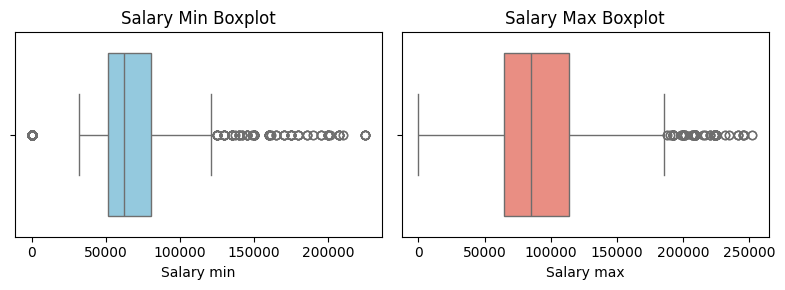

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)  
sns.boxplot(x=df['Salary min'], color='skyblue')
plt.title('Salary Min Boxplot')
plt.subplot(1, 2, 2) 
sns.boxplot(x=df['Salary max'], color='salmon')
plt.title('Salary Max Boxplot')
plt.tight_layout()
plt.show()

In [25]:
df[["Salary min","Salary max"]].value_counts().tail()

Salary min  Salary max
70000.0     76900.0       1
82666.0     125369.0      1
70000.0     74561.0       1
105000.0    113000.0      1
65232.0     130000.0      1
Name: count, dtype: int64

In [26]:
df[["Salary min","Salary max"]].value_counts().head(5)

Salary min  Salary max
62370.0     93587.0       72
59116.0     91768.0       69
62370.0     71726.0       66
80931.0     208826.0      65
74041.0     85147.0       56
Name: count, dtype: int64

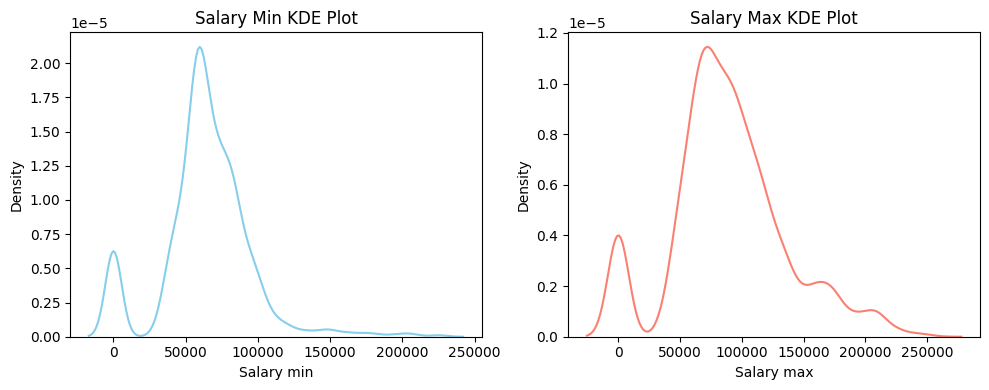

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1) 
sns.kdeplot(df['Salary min'], color='skyblue')
plt.title('Salary Min KDE Plot')
plt.subplot(1, 2, 2) 
sns.kdeplot(df['Salary max'], color='salmon')
plt.title('Salary Max KDE Plot')
plt.tight_layout()
plt.show()

- there are extreme salary observations that are affecting the mean significantly. These outliers distort the average, making it unrepresentative of the majority of job postings. This can lead to misleading insights and bias your model , need to remove these outliers 


In [28]:
df.shape

(5101, 26)

In [32]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'Salary min')


df = remove_outliers_iqr(df, 'Salary max')

In [33]:
df.shape

(4173, 26)

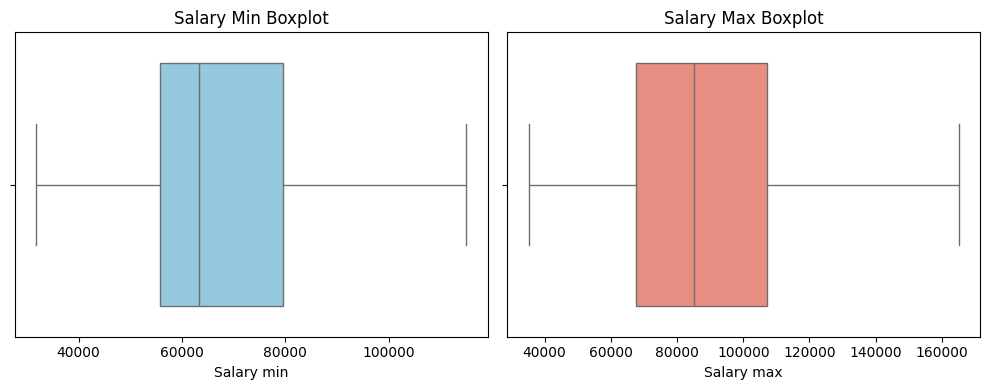

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)  
sns.boxplot(x=df['Salary min'], color='skyblue')
plt.title('Salary Min Boxplot')
plt.subplot(1, 2, 2) 
sns.boxplot(x=df['Salary max'], color='salmon')
plt.title('Salary Max Boxplot')
plt.tight_layout()
plt.show()

# Note
If you're running all the cells, make sure to run the IQR code once or twice to properly detect and remove outliers.



In [35]:
df[["Salary min" , "Salary max"]].mean()  , df[["Salary min" , "Salary max"]].median()

(Salary min    66763.164764
 Salary max    88671.054244
 dtype: float64,
 Salary min    63228.0
 Salary max    85147.0
 dtype: float64)

In [36]:
data[["Salary min" , "Salary max"]].mean()  , data[["Salary min" , "Salary max"]].median()

(Salary min    64633.627820
 Salary max    89909.217949
 dtype: float64,
 Salary min    62397.0
 Salary max    85147.0
 dtype: float64)

- Before removing outliers, the average salary was getting skewed because of a few extreme values. After removing them, the mean salary min increased and salary max slightly decreased, giving a more realistic view. I removed these outliers to make sure the salary data reflects true patterns across different segments and categories, which will also help the model learn better and give more accurate results.























# EDA 
- Now I will start with univariate bivariate and multivariate analysis on both salary columns to understand the patterns and relationships in the data. This will help me figure out which features are actually important for predicting salary. I will also drop irrelevant features and consider constructing new ones to improve model performance and interpretation.














In [37]:
df.head(3)

Job ID                         Agency Posting Type  Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External          1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal          1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal          1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   

                                        Job Category Fullorparttime  \
0  Constituent Services & Community Programs Heal...              F   
1  Policy, Research & Analysis Public Safety, Ins...              F   
2              Engineering, Architecture, & Planning              F   

                Career Level  Salary min  Salary max Salary Frequency  \
0  Experienced (non-manager)     82506.0     94882.0           Annual   
1  Experienced (non-manager)     58682.0    134570.0           Annual   
2  Experienced (non-manager)     58682.0     91405.0           Annual   

                    Work Location              Division/Work Unit  \
0               42-09 28th Street  Maternal, Infant, & Repr. Hlth   
1  30-30 Thomson Ave L I City Qns        Pub Bldgs/Transportation   
2  30-30 Thomson Ave L I City Qns  PUB BLDGS/CPD/Library/Brooklyn   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   
1  Hours: Full-Time â 35 Hours Work Location: 3...   
2  Hours: Full-Time â 35 Hours Work Location: 3...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   
1  1. A baccalaureate degree from an accredited c...   
2  1. A baccalaureate degree from an accredited c...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   
1  Candidates must have excellent management skil...   
2  Candidates should have at least six years of e...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2  Authorization to work in the United States is ...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   
1  For City Employees, please go to Employee Self...   
2                        Click the Apply Now button.   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   
1  New York City Residency is not required for th...   10/03/2023   
2  New York City Residency is not required for th...   02/01/2024   

  Posting Updated Process Date  
0      01/23/2024   03/04/2024  
1      11/29/2023   03/04/2024  
2      02/01/2024   03/04/2024

- First I will drop the ID column because it does not provide any meaningful information for prediction. It is just a unique identifier and does not contribute to understanding or modeling the target variable.









In [38]:
df2 = df.drop(columns="Job ID")

In [39]:
df2.sample()

Agency Posting Type  Positions    Business Title  \
592  DEPARTMENT OF INVESTIGATION     External          1  Operations Chief   

          Civil Service Title Title Classification Title Code No Level  \
592  DEPUTY INSPECTOR GENERAL    Non-Competitive-5         31144    M2   

                                          Job Category Fullorparttime  \
592  Administration & Human Resources Public Safety...              F   

    Career Level  Salary min  Salary max Salary Frequency    Work Location  \
592      Manager    100000.0    130000.0           Annual  180 Maiden Lane   

     Division/Work Unit                                    Job Description  \
592  Executive Division  The New York City Department of Investigation ...   

                             Minimum Qual Requirements  \
592  1. A baccalaureate degree from an accredited c...   

                                      Preferred Skills  \
592  â¢\tA Masterâs Degree in public administrat...   

                                Additional Information  \
592  Authorization to work in the United States is ...   

                                              To Apply  \
592  All current City Employees may apply by going ...   

                                 Residency Requirement Posting Date  \
592  New York City residency is generally required ...   10/06/2023   

    Posting Updated Process Date  
592      02/06/2024   03/04/2024

In [40]:
df2["Agency"].value_counts()

Agency
DEPT OF ENVIRONMENT PROTECTION    730
HRA/DEPT OF SOCIAL SERVICES       680
DEPT OF HEALTH/MENTAL HYGIENE     642
DEPT OF DESIGN & CONSTRUCTION     428
DEPARTMENT OF TRANSPORTATION      362
NYC HOUSING AUTHORITY             220
BRONX DISTRICT ATTORNEY           102
DEPARTMENT OF CORRECTION           81
FINANCIAL INFO SVCS AGENCY         79
HOUSING PRESERVATION & DVLPMNT     68
ADMIN FOR CHILDREN'S SVCS          64
DEPT OF CITYWIDE ADMIN SVCS        58
OFFICE OF THE COMPTROLLER          55
DEPT. OF HOMELESS SERVICES         52
OFFICE OF MANAGEMENT & BUDGET      42
DISTRICT ATTORNEY-MANHATTAN        40
CAMPAIGN FINANCE BOARD             36
TAXI & LIMOUSINE COMMISSION        34
CONSUMER AND WORKER PROTECTION     30
OFFICE OF EMERGENCY MANAGEMENT     29
DEPARTMENT OF CITY PLANNING        22
FIRE DEPARTMENT                    21
NYC EMPLOYEES RETIREMENT SYS       20
DEPARTMENT FOR THE AGING           20
OFF OF PAYROLL ADMINISTRATION      20
HUMAN RIGHTS COMMISSION            20
LAW D

In [41]:
agency_salary = df2.groupby("Agency")[["Salary min", "Salary max"]].mean().sort_values("Salary max", ascending=False)
agency_salary

Salary min     Salary max
Agency                                                     
DEPT OF YOUTH & COMM DEV SRVS   71226.888889  121901.555556
NYC EMPLOYEES RETIREMENT SYS    90825.900000  116482.300000
DEPARTMENT OF BUSINESS SERV.    71566.500000  113500.000000
DEPARTMENT OF PROBATION         76478.789474  107046.210526
TAX COMMISSION                  72235.500000  105552.500000
OFFICE OF CRIMINAL JUSTICE      65625.857143  102857.142857
FIRE DEPARTMENT                 67198.428571  101950.714286
DEPARTMENT OF TRANSPORTATION    66014.635359  101595.900552
OFFICE OF LABOR RELATIONS       73684.750000  101000.500000
ADMIN FOR CHILDREN'S SVCS       70323.984375  100860.625000
DEPT OF ENVIRONMENT PROTECTION  68602.545205  100161.300000
OFFICE OF RACIAL EQUITY         58700.000000  100000.000000
FINANCIAL INFO SVCS AGENCY      81014.822785   99469.974684
DISTRICT ATTORNEY RICHMOND COU  81428.571429   96000.000000
DEPT. OF HOMELESS SERVICES      63074.115385   95451.423077
OFFICE OF THE COMPTROLLER       83477.436364   95338.436364
DEPARTMENT OF INVESTIGATION     78932.600000   94700.000000
LAW DEPARTMENT                  67021.473684   93955.473684
DEPARTMENT OF CITY PLANNING     81825.090909   93661.727273
DEPT OF DESIGN & CONSTRUCTION   67235.126168   93383.859813
EQUAL EMPLOY PRACTICES COMM     59116.000000   91768.000000
TECHNOLOGY & INNOVATION         82967.000000   90666.666667
CIVILIAN COMPLAINT REVIEW BD    65818.000000   89911.000000
DEPARTMENT OF BUILDINGS         76835.000000   88360.000000
DEPT OF CITYWIDE ADMIN SVCS     75301.000000   87062.793103
NYC HOUSING AUTHORITY           58306.950000   86071.227273
DEPARTMENT FOR THE AGING        73713.900000   85171.600000
OFF OF PAYROLL ADMINISTRATION   56765.000000   84474.600000
DEPT OF RECORDS & INFO SERVICE  67528.666667   83456.666667
DEPT OF PARKS & RECREATION      77105.916667   83197.500000
HRA/DEPT OF SOCIAL SERVICES     64470.080882   82760.233824
HUMAN RIGHTS COMMISSION         67751.800000   82715.300000
DEPARTMENT OF FINANCE           70712.600000   81769.600000
CAMPAIGN FINANCE BOARD          72944.444444   79722.222222
NYC POLICE PENSION FUND         69090.000000   79454.000000
CONFLICTS OF INTEREST BOARD     69090.000000   79000.000000
DEPT OF HEALTH/MENTAL HYGIENE   65660.714953   78921.736449
OFFICE OF MANAGEMENT & BUDGET   65097.095238   78495.000000
DEPARTMENT OF CORRECTION        66161.012346   78187.444444
TAXI & LIMOUSINE COMMISSION     60908.000000   78061.058824
ADMIN TRIALS AND HEARINGS       72478.750000   77348.500000
POLICE DEPARTMENT               57114.658462   77097.427692
HOUSING PRESERVATION & DVLPMNT  70483.852941   73787.352941
OFFICE OF EMERGENCY MANAGEMENT  65258.620690   73133.172414
CONSUMER AND WORKER PROTECTION  58784.133333   71910.000000
BRONX COMMUNITY BOARD #7        41887.000000   69709.000000
MAYORS OFFICE OF CONTRACT SVCS  56675.000000   68750.000000
BRONX DISTRICT ATTORNEY         64110.098039   66520.529412
PUBLIC ADMINISTRATOR-NEW YORK   45850.000000   66014.000000
DISTRICT ATTORNEY KINGS COUNTY  59103.285714   61878.857143
NYC FIRE PENSION FUND           45227.000000   61016.000000
PRESIDENT BOROUGH OF MANHATTAN  59558.000000   59558.000000
DISTRICT ATTORNEY-MANHATTAN     56324.850000   59526.500000
TEACHERS RETIREMENT SYSTEM      50000.000000   52011.000000
MANHATTAN COMMUNITY BOARD #8    42500.000000   45000.000000
MANHATTAN COMMUNITY BOARD #12   45000.000000   45000.000000

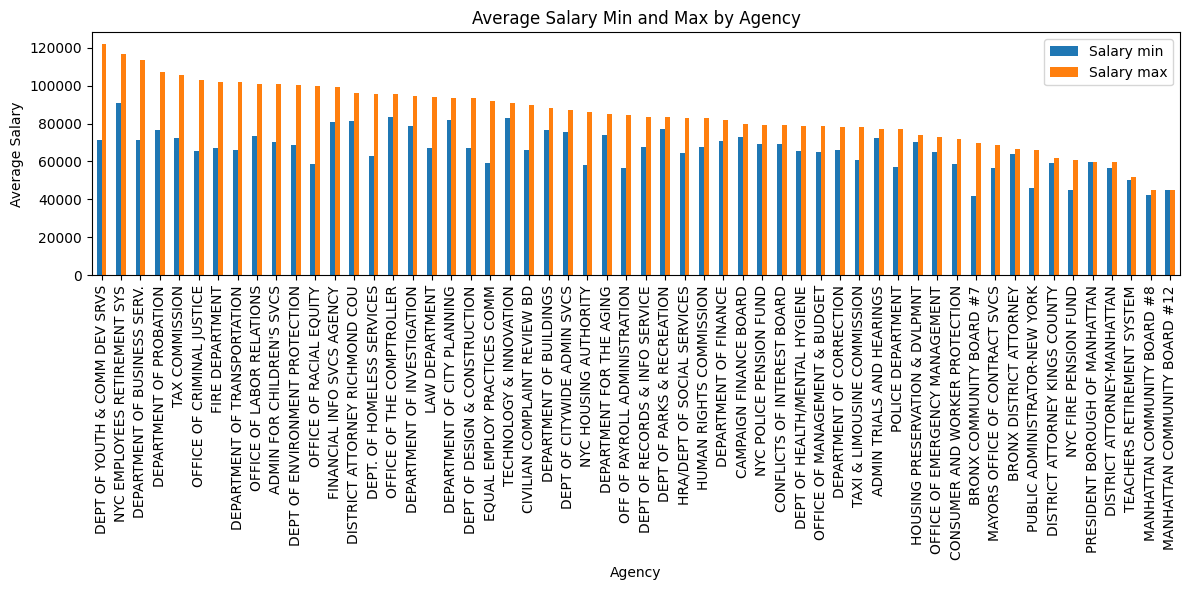

In [42]:
agency_salary.plot(kind="bar", figsize=(12,6))
plt.title("Average Salary Min and Max by Agency")
plt.ylabel("Average Salary")
plt.xlabel("Agency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- I found that some agencies are giving more high paying jobs especially the ones on the top left of the chart which means if someone wants a better salary they should target these agencies because their maximum salaries are quite high .The agencies on the right side are offering lower salary jobs so they might not be the best choice for someone looking for a high paying role

- When I looked at the minimum salary across all agencies I noticed a lot of fluctuation even the top agencies sometimes offer low starting salaries which probably depends on things like the interview performance or the role level.This shows that the agency feature is very useful for the model because it helps in predicting the possible salary range more accurately based on which agency is offering the job

- Taking only the top 20 agencies and grouping the rest as 'Others' will reduce dimensionality which helps in simplifying the model and improving performance.









In [43]:
top_20_agencies = agency_salary.head(20).index
df2['Agency'] = df2['Agency'].apply(lambda x: x if x in top_20_agencies else 'Others')

In [44]:
df2['Agency'].value_counts()

Agency
Others                            2228
DEPT OF ENVIRONMENT PROTECTION     730
DEPT OF DESIGN & CONSTRUCTION      428
DEPARTMENT OF TRANSPORTATION       362
FINANCIAL INFO SVCS AGENCY          79
ADMIN FOR CHILDREN'S SVCS           64
OFFICE OF THE COMPTROLLER           55
DEPT. OF HOMELESS SERVICES          52
DEPARTMENT OF CITY PLANNING         22
FIRE DEPARTMENT                     21
NYC EMPLOYEES RETIREMENT SYS        20
DEPARTMENT OF PROBATION             19
LAW DEPARTMENT                      19
DEPT OF YOUTH & COMM DEV SRVS       18
DISTRICT ATTORNEY RICHMOND COU      14
OFFICE OF CRIMINAL JUSTICE          14
DEPARTMENT OF INVESTIGATION         10
OFFICE OF LABOR RELATIONS            8
DEPARTMENT OF BUSINESS SERV.         4
TAX COMMISSION                       4
OFFICE OF RACIAL EQUITY              2
Name: count, dtype: int64

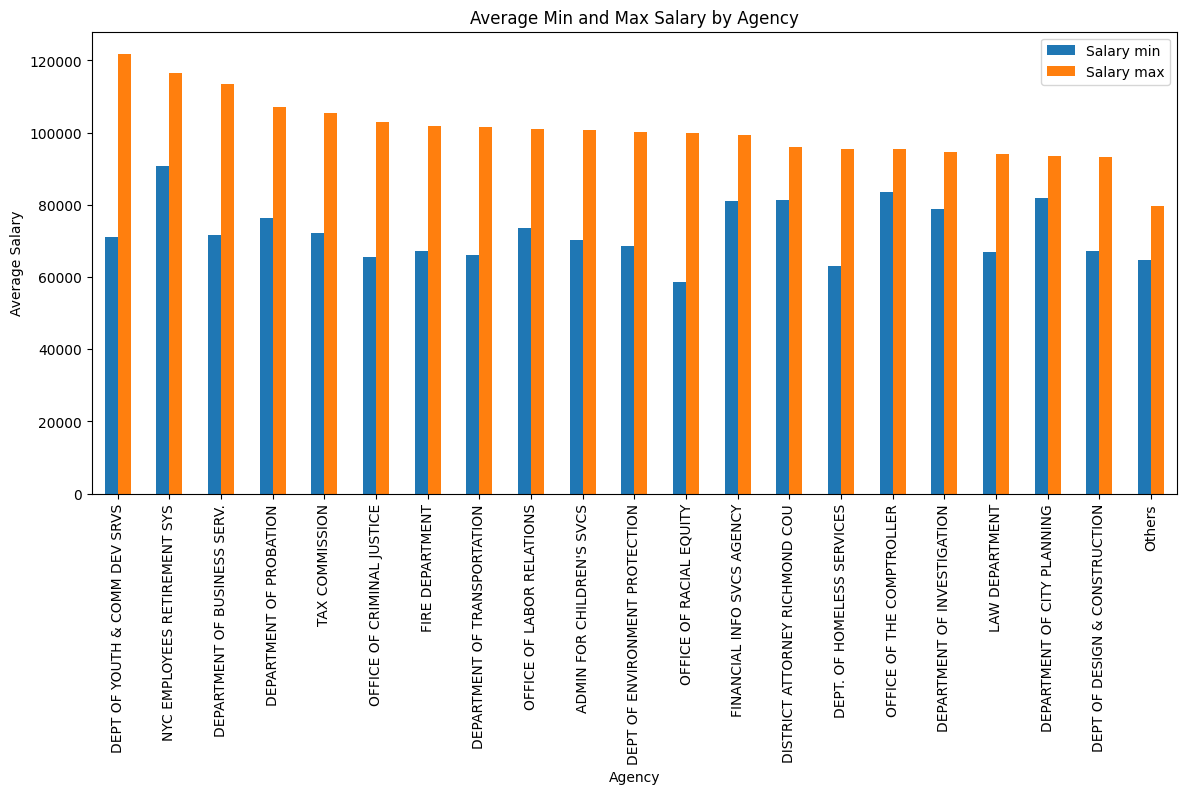

In [45]:
avg_salary_by_agency = df2.groupby('Agency')[['Salary min', 'Salary max']].mean().sort_values("Salary max", ascending=False)
avg_salary_by_agency.plot(kind='bar', figsize=(14, 6))
plt.title("Average Min and Max Salary by Agency")
plt.ylabel("Average Salary")
plt.xlabel("Agency")
plt.xticks(rotation=90)
plt.show()

In [46]:
df2.sample()

Agency Posting Type  Positions  \
1236  DEPT OF ENVIRONMENT PROTECTION     External          1   

               Business Title      Civil Service Title Title Classification  \
1236  Associate Staff Analyst  ASSOCIATE STAFF ANALYST        Competitive-1   

     Title Code No Level                        Job Category Fullorparttime  \
1236         12627    00  Finance, Accounting, & Procurement              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
1236  Experienced (non-manager)     70611.0    105138.0           Annual   

                    Work Location          Division/Work Unit  \
1236  96-05 Horace Harding Expway  BWT/CONTRACT ADMIN./BUDGET   

                                        Job Description  \
1236  ***IMPORTANT NOTE: Only those currently servin...   

                              Minimum Qual Requirements  \
1236  1. A masterâs degree from an accredited coll...   

                                       Preferred Skills  \
1236  1. Excellent written and oral communication sk...   

                                 Additional Information  \
1236  Appointments are subject to OMB approval.  For...   

                     To Apply  \
1236  Click Apply Now button.   

                                  Residency Requirement Posting Date  \
1236  New York City residency is generally required ...   11/16/2022   

     Posting Updated Process Date  
1236      11/16/2022   03/04/2024

In [47]:
df2["Posting Type"].value_counts()

Posting Type
Internal    2126
External    2047
Name: count, dtype: int64

In [48]:
posting_type_percent = df2['Posting Type'].value_counts(normalize=True) * 100
print(posting_type_percent)

Posting Type
Internal    50.946561
External    49.053439
Name: proportion, dtype: float64


In [49]:
posting_salary = df2.groupby('Posting Type')[['Salary min', 'Salary max']].mean().round(0)
print(posting_salary)

              Salary min  Salary max
Posting Type                        
External         66854.0     88408.0
Internal         66676.0     88924.0


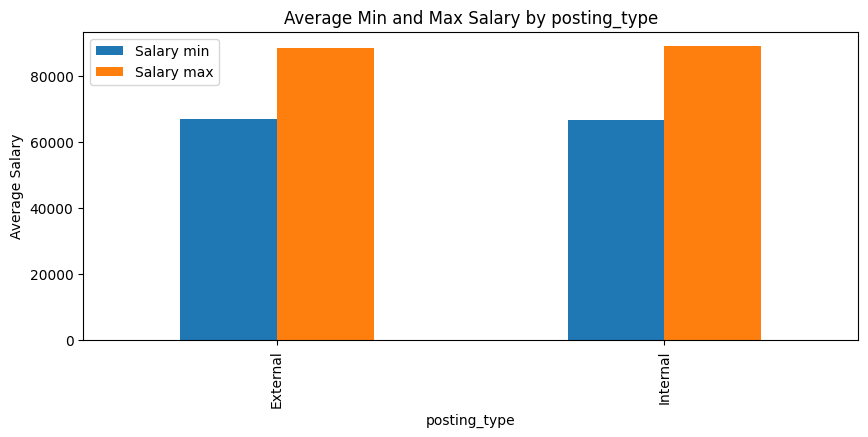

In [50]:
posting_salary.plot(kind='bar', figsize=(10,4))
plt.title("Average Min and Max Salary by posting_type")
plt.ylabel("Average Salary")
plt.xlabel("posting_type")
plt.show()

- After analyzing the data by Posting Type, I observed that there is almost no significant difference in the average minimum and maximum salaries between External and Internal job postings. The difference is very small and can be considered negligible.

- This feature is good for the model as it has minimal impact. It shows recruiters that regardless of the posting type, the average salary is the same, preventing them from overloading one role with more tasks or giving an unfair salary. Also, people will already be aware of this, so it helps maintain fairness in salary distribution.









In [51]:
df2["Positions"].value_counts()

Positions
1      3336
2       360
3       136
4        78
5        63
6        38
7        35
10       25
8        21
9        13
15       10
18        7
11        6
24        4
12        4
25        4
16        4
60        4
70        4
13        3
98        2
46        2
17        2
150       2
26        2
40        2
32        2
30        2
19        2
Name: count, dtype: int64

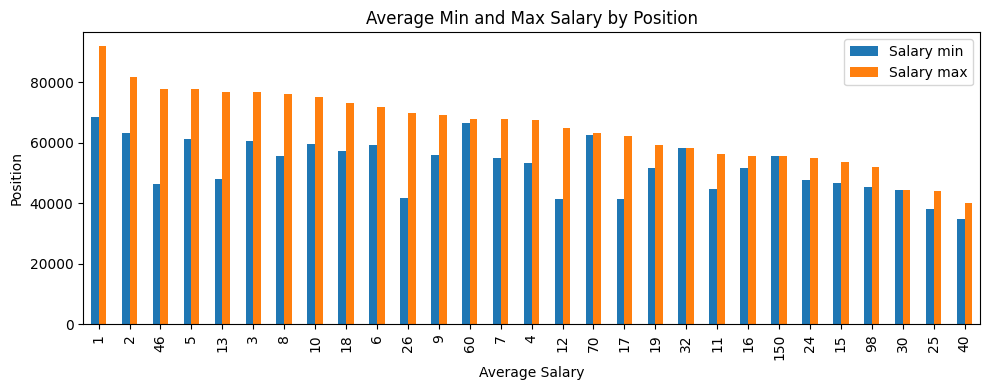

In [52]:
avg_salary_by_positions = df2.groupby('Positions')[['Salary min', 'Salary max']].mean().sort_values("Salary max", ascending=False)
avg_salary_by_positions.plot(kind='bar', figsize=(10,4))
plt.title("Average Min and Max Salary by Position")
plt.xlabel("Average Salary")
plt.ylabel("Position")
plt.tight_layout()
plt.show()

In [53]:
df2["Positions"].value_counts().count()

29

- "The 'Positions' column indicates how many job openings are available for a specific job post. During my analysis, I observed that job posts with a higher number of available positions tend to offer lower minimum and maximum salaries. However, there are some exceptions where certain jobs have both a high number of available positions and a relatively high maximum salary, while the minimum salary remains on the lower side. These job roles stand out from the general trend."

- This analysis helps recruiters and HR teams understand how salary varies with the number of job openings, aiding in budget and compensation planning.It also benefits job seekers by giving insights into which roles offer better pay despite high availability.



- I will convert avg_salary_by_positions into 3 - 4 salary buckets to make it easier for the model to understand the data. This transformation will reduce dimensionality and help capture salary-related patterns more effectively in fewer categories.



In [54]:
def categorize_Positions(Positions):
    if Positions in [1,2,46,5,13,3,8,10]:  
        return "low"
    elif Positions in [6,26,9,60,7,4,12,70,17]: 
        return "Medium"
    elif Positions in [19,32,11,16,150,24]:
        return "high"
    else:
        return "veryhigh"

df2["Positions"] = df2["Positions"].apply(categorize_Positions)

In [55]:
df2["Positions"].value_counts()

Positions
low         3946
Medium       180
veryhigh      27
high          20
Name: count, dtype: int64

In [56]:
avg_salary_by_positions = df2.groupby('Positions')[['Salary min', 'Salary max']].mean().sort_values("Salary max", ascending=False)
avg_salary_by_positions

Salary min    Salary max
Positions                            
low        67520.628880  89983.493756
Medium     55012.705556  68475.572222
high       49757.000000  56255.900000
veryhigh   46994.740741  55508.222222

In [57]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
4103  Others     External       low     UNIT CLERK  CLERICAL ASSOCIATE   

     Title Classification Title Code No Level  \
4103        Competitive-1         10251    03   

                          Job Category Fullorparttime  \
4103  Administration & Human Resources              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
4103  Experienced (non-manager)     36390.0     58953.0           Annual   

             Work Location        Division/Work Unit  \
4103  4 World Trade Center  Off Of ChildÂ  Enforc-NM   

                                        Job Description  \
4103  MUST BE PERMANET IN THE CIVIL SERVICE CLERICAL...   

                              Minimum Qual Requirements  \
4103  Qualification Requirements  A four-year high s...   

                                       Preferred Skills  \
4103  â¢\tGood, courteous communication skills.  â...   

                                 Additional Information  \
4103  The federal government provides student loan f...   

                    To Apply  \
4103  Click Apply Now Button   

                                  Residency Requirement Posting Date  \
4103  New York City residency is generally required ...   06/30/2022   

     Posting Updated Process Date  
4103      02/01/2024   03/04/2024

In [58]:
df["Business Title"].value_counts().count()

1448

In [59]:
bt_counts = df["Business Title"].value_counts()
pd.set_option('display.max_rows', None) 
print(bt_counts)

Business Title
CASE MANAGEMENT SUPERVISOR                                                                                          62
Project Manager                                                                                                     61
ACCOUNTABLE MANAGER                                                                                                 52
Deputy Director                                                                                                     38
CASE MANAGEMENT TEAM LEADER                                                                                         36
Senior Project Manager                                                                                              28
Director                                                                                                            24
Child Care Inspector, Bureau of Childcare                                                                           22
Design Engineer                  

In [60]:
Business_Title = df2.groupby('Business Title')[['Salary min', 'Salary max']].mean().sort_values("Salary max", ascending=False)
Business_Title.head() , Business_Title.tail() , Business_Title.describe()

(                                                    Salary min  Salary max
 Business Title                                                            
 Special Victims Division: Major Case Assistant ...    115000.0    165000.0
 Clinical Advisor/Viral Hepatitis Director, Bure...     97187.0    165000.0
 ASSISTANT DEPUTY COMMISSIONER, HRA TECHNOLOGIES        80931.0    164285.0
 Assistant Commissioner (Applications Development)      72038.0    163598.0
 Assistant Director (Technical Budget)                 102292.0    163512.0,
                                  Salary min  Salary max
 Business Title                                         
 CITY CUSTODIAL ASSISTANT           35252.00    40338.00
 Air Pollution Inspector            38192.00    40096.00
 Community Service Aide             32083.00    38535.00
 School Crossing Guard, Level II    37834.56    37834.56
 City Custodial Assistant           35252.00    37795.00,
           Salary min     Salary max
 count    1448.000000    1448.

In [61]:
Business_Title 

Salary min  \
Business Title                                                      
Special Victims Division: Major Case Assistant ...  115000.000000   
Clinical Advisor/Viral Hepatitis Director, Bure...   97187.000000   
ASSISTANT DEPUTY COMMISSIONER, HRA TECHNOLOGIES      80931.000000   
Assistant Commissioner (Applications Development)    72038.000000   
Assistant Director (Technical Budget)               102292.000000   
Director, Special Reports                           102292.000000   
Deputy Chief of ITS Engineering Unit                 58682.000000   
Director of Contract Agency Audits                   58700.000000   
Director of Legal Services                           74730.000000   
AREA ENGINEER - ADMINISTRATIVE ENGINEER              58700.000000   
Director, Mental Health Contracts                    74730.000000   
Deputy Director Design and Construction              58700.000000   
EHS Assessment Manager                               58700.000000   
Reliability Centered Maintenance Engineer            58700.000000   
ADMINISTRATIVE ACCOUNTANT                            58700.000000   
Port Superintendent                                  58700.000000   
Neighborhood Planner                                 58700.000000   
EHS/CRM Information Systems Manager                  75000.000000   
Director, Technology Ideation                        75000.000000   
Assistant Commissioner, Health Promotion of Jus...   80931.000000   
IT Business Analyst                                  75000.000000   
Director of Application Support                     100000.000000   
Executive Director of Creative Communications, ...   72038.000000   
SENIOR ENTERPRISE ARCHITECT                          75000.000000   
Senior IT Business Analyst                           75000.000000   
Associate Executive Director                         80931.000000   
BOB- Administrative Construction Project Manager     58682.000000   
BOB- Project Manager/Engineer-In-Charge              58682.000000   
BOB- Engineer-In-Charge                              58682.000000   
Director for RIS Administration                      58682.000000   
LEAD PROJECT MANAGER                                 58682.000000   
Design-Build Project Manager                         58254.500000   
Executive Director                                   80237.500000   
EHS Regional Manager                                 56972.000000   
ASSISTANT DEPUTY COMMISSIONER                        80931.000000   
Assistant Corporation Counsel - Family Court         78034.000000   
Director of Specialty Construction Projects          56972.000000   
Chief Workforce Development Officer                  88437.000000   
ASSISTANT DEPUTY COMMISSIONER, FINANCE, CONTRAC...  100000.000000   
EXECUTIVE DIRECTOR, HRA TECHNOLOGY/ELIGIBILITY ...   77688.000000   
Contract and Administration Unit Lead                65232.000000   
SENIOR PROCUREMENT COORDINATOR                       65232.000000   
DESIGN-BUILD PROJECT MANAGER                         71944.666667   
Chief of Bluebelt Planning and Design                64922.000000   
Senior Program Manager Metered Curb Planning         67584.666667   
BOROUGH COMMISSIONER                                 64922.000000   
Senior Advisor to the Deputy Commissioner, ODHR      58700.000000   
Program Manager                                      58700.000000   
FLEET PROCUREMENT SUPERVISOR                         78225.666667   
DSU Director, Bureau of Hepatitis, HIV, and STI     108071.000000   
EXECUTIVE DIRECTOR OF NETWORK INFRASTRUCTURE & ...   78721.000000   
EXECUTIVE DIRECTOR, OFFICE OF CIVIL JUSTICE         102292.000000   
Area Engineer                                        53702.000000   
Region Supervisor                                    53702.000000   
Senior Port Engineer                                 53702.000000   
AREA ENGINEER â ELECTRICAL ENGINEERING             78585.000000   
Distribution Area Engineer                          1

In [62]:
Business_Title.head(20)

Salary min  Salary max
Business Title                                                            
Special Victims Division: Major Case Assistant ...    115000.0    165000.0
Clinical Advisor/Viral Hepatitis Director, Bure...     97187.0    165000.0
ASSISTANT DEPUTY COMMISSIONER, HRA TECHNOLOGIES        80931.0    164285.0
Assistant Commissioner (Applications Development)      72038.0    163598.0
Assistant Director (Technical Budget)                 102292.0    163512.0
Director, Special Reports                             102292.0    163512.0
Deputy Chief of ITS Engineering Unit                   58682.0    162537.0
Director of Contract Agency Audits                     58700.0    161534.0
Director of Legal Services                             74730.0    161534.0
AREA ENGINEER - ADMINISTRATIVE ENGINEER                58700.0    161534.0
Director, Mental Health Contracts                      74730.0    161534.0
Deputy Director Design and Construction                58700.0    161534.0
EHS Assessment Manager                                 58700.0    161534.0
Reliability Centered Maintenance Engineer              58700.0    161534.0
ADMINISTRATIVE ACCOUNTANT                              58700.0    161534.0
Port Superintendent                                    58700.0    161534.0
Neighborhood Planner                                   58700.0    161534.0
EHS/CRM Information Systems Manager                    75000.0    160000.0
Director, Technology Ideation                          75000.0    160000.0
Assistant Commissioner, Health Promotion of Jus...     80931.0    160000.0

- This analysis shows that if a candidate aims for one of the top 20 Business Titles, there is a high chance of getting a better salary.It can help candidates focus on high-paying job roles, and recruiters can use this insight to plan their hiring strategies and salary budgets more effectively.

In [63]:
Business_Title.shape

(1448, 2)

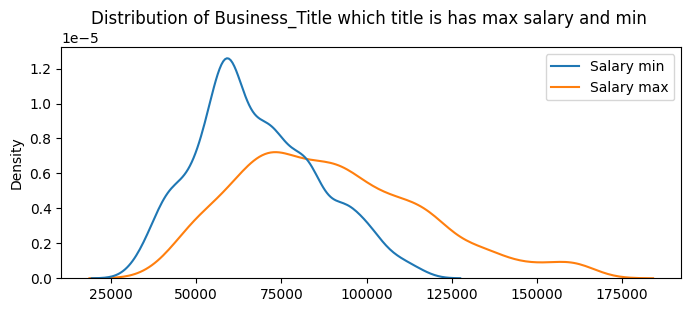

In [64]:
plt.figure(figsize=(8,3))
sns.kdeplot(data= Business_Title )
plt.title("Distribution of Business_Title which title is has max salary and min ")
plt.show()

- As we sorted the job titles based on their average salaries, it became clear that many different titles fall within similar salary ranges. So instead of keeping all these individual titles, which can increase the model's complexity, we can group them into salary-based buckets.

- This way, titles with similar salary levels will belong to the same category, helping the model understand which group represents high-paying, mid-level, or low-paying jobs more effectively.

- For example, Civil Engineer and Software Engineer have the word "Engineer", but their salaries are very different. If we group them just by name, the model might get learn worng and give wrong predictions. model learn both Engineer  are same but there salarys are diff So, grouping by salary range is a smarter and more useful method.

In [65]:
Business_Title = df2.groupby('Business Title')[['Salary min', 'Salary max']].mean()
Business_Title['Salary_Bucket'] = pd.qcut(Business_Title['Salary max'], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])
df2['Business Title'] = df2['Business Title'].map(Business_Title['Salary_Bucket'])

In [66]:
df2['Business Title'].value_counts()

Business Title
Very Low     937
Medium       873
High         839
Very High    782
Low          742
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\823056597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Business_Title2 = df2.groupby('Business Title')[['Salary min', 'Salary max']].mean()


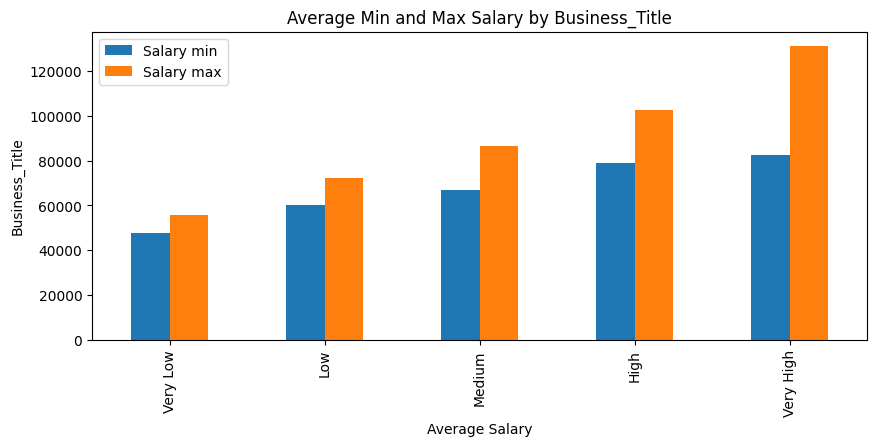

In [67]:
Business_Title2 = df2.groupby('Business Title')[['Salary min', 'Salary max']].mean()
Business_Title2.plot(kind='bar', figsize=(10,4))
plt.title("Average Min and Max Salary by Business_Title")
plt.xlabel("Average Salary")
plt.ylabel("Business_Title")
plt.show()

In [68]:
df2.head(1)

Agency Posting Type Positions Business Title      Civil Service Title  \
0  Others     External       low           High  CITY RESEARCH SCIENTIST   

  Title Classification Title Code No Level  \
0    Non-Competitive-5         21744    02   

                                        Job Category Fullorparttime  \
0  Constituent Services & Community Programs Heal...              F   

                Career Level  Salary min  Salary max Salary Frequency  \
0  Experienced (non-manager)     82506.0     94882.0           Annual   

       Work Location              Division/Work Unit  \
0  42-09 28th Street  Maternal, Infant, & Repr. Hlth   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   

  Posting Updated Process Date  
0      01/23/2024   03/04/2024

In [69]:
df2["Civil Service Title"].value_counts()

Civil Service Title
COMMUNITY COORDINATOR               265
CITY RESEARCH SCIENTIST             228
PRINCIPAL ADMINISTRATIVE ASSOC      181
COMMUNITY ASSOCIATE                 168
ADMINISTRATIVE STAFF ANALYST (      148
CLERICAL ASSOCIATE                  132
AGENCY ATTORNEY                     123
CIVIL ENGINEER                       98
ASSOCIATE PROJECT MANAGER            97
ASSISTANT CIVIL ENGINEER             88
COMPUTER SPECIALIST (SOFTWARE)       77
ASSOCIATE STAFF ANALYST              76
ASSOCIATE JOB OPPORTUNITY SPEC       70
ASSOCIATE BENEFITS OPPORTUNITY       66
CONSTRUCTION PROJECT MANAGER         62
ADMINISTRATIVE PROJECT MANAGER       55
CIVIL ENGINEERING INTERN             52
PUBLIC HEALTH ADVISER                51
PROCUREMENT ANALYST                  49
ADM MANAGER-NON-MGRL FRM M1/M2       47
BUDGET ANALYST (OMB)                 40
IT PROJECT SPECIALIST                40
ASSISTANT RESIDENT BUILDING SU       38
PUBLIC HEALTH SANITARIAN             38
STAFF ANALYST       

In [70]:
df2["Civil Service Title"].value_counts().count()

280

- Even Civil Service Title has slightly more titles 

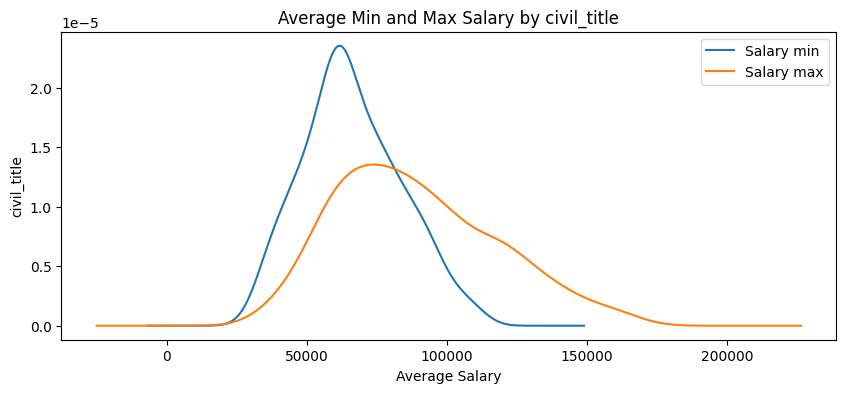

In [71]:
civil_title = df2.groupby('Civil Service Title')[['Salary min', 'Salary max']].mean().sort_values("Salary max", ascending=False)
civil_title.plot(kind="kde", figsize=(10,4))
plt.title("Average Min and Max Salary by civil_title")
plt.xlabel("Average Salary")
plt.ylabel("civil_title")
plt.show()


- i will do same with Civil Service Title , as i do with Business_Title and mention earlier 

In [72]:
civil_title

Salary min     Salary max
Civil Service Title                                           
Assistant Commissioner of Info     72038.000000  163598.000000
ADMINISTRATIVE TRANSPORTATION      58700.000000  161534.000000
ADMINISTRATIVE PUBLIC HEALTH S     58700.000000  161534.000000
REGIONAL DIRECTOR MENTAL HEALT     80931.000000  160000.000000
DIRECTOR OF PUBLIC RELATIONS (     72038.000000  160000.000000
ADMINISTRATIVE CONSTRUCTION PR     65220.000000  155595.666667
ADMINISTRATIVE STAFF ANALYST       89596.142857  151517.714286
BOROUGH COMMISSIONER (DEP)         64922.000000  150000.000000
ADMINISTRATIVE ENGINEER            65387.809524  147901.619048
ADMINISTRATIVE QUALITY ASSURAN     63332.000000  147388.000000
ADM HOUSING DEV SPEC(NON MGRL)     53702.000000  146121.000000
CHIEF INVESTIGATING ACCOUNTANT     90000.000000  145000.000000
ADM CONSTRUCTION PRJ MGR-NM        57827.000000  142246.600000
ADMINISTRATIVE COMMUNITY RELAT     82343.600000  141740.000000
ADMINISTRATIVE HOUSING SUPERIN     60255.500000  141342.000000
ADMINISTRATIVE FIRE PROTECTION     72038.000000  140000.000000
ADMINISTRATIVE PROJECT MANAGER     61874.800000  139022.072727
ADM CITY PLANNER (NON MGRL)        62350.923077  137175.615385
ADM ENGINEER (NON MGRL)            59547.500000  136965.781250
MARINE ENGINEER                   100188.000000  136110.000000
ADM PROC ANAL-NM FRM M1-3          65232.000000  134881.250000
ADMINISTRATIVE CITY PLANNER        87461.000000  134533.000000
INTELLIGENCE RESEARCH SPECIALI     91527.000000  133703.000000
ADMINISTRATIVE ACCOUNTANT          85480.000000  132613.600000
IT PROJECT SPECIALIST              87000.000000  132369.100000
DEPUTY INSPECTOR GENERAL          100000.000000  130000.000000
INVESTMENT MANAGER (COMPTROLLE    106666.666667  129633.333333
SENIOR IT ARCHITECT               100000.000000  129333.333333
ADMINISTRATIVE PUBLIC HEALTH N     68321.750000  129250.000000
EXECUTIVE PROGRAM SPECIALIST (     69204.400000  128400.000000
ADMINISTRATIVE MANAGER             87965.500000  127500.000000
COMPUTER SYSTEMS MANAGER           84886.285714  127489.357143
ADMIN COMMUNITY RELATIONS SPEC     64749.000000  127118.444444
EXECUTIVE AGENCY COUNSEL           80869.642857  126908.000000
SPECIAL ASSISTANT TO THE DISTR     95000.000000  125000.000000
CERTIFIED IT ADMINISTRATOR (LA     90806.200000  124502.000000
IT INFRASTRUCTURE ENGINEER        106000.000000  124000.000000
ADMINISTRATIVE CONTRACT SPECIA     60514.000000  122666.666667
CHEMICAL ENGINEER                  89713.666667  122527.000000
NURSE PRACTITIONER(DEPT HEALTH     79195.000000  121545.000000
ENVIRONMENTAL ENGINEER             87543.625000  120585.500000
ELECTRICAL ENGINEER                90758.333333  120344.333333
AREA SUPERVISOR (HIGHWAY MAINT     76508.500000  120239.750000
COMMUNICATIONS OFFICER            110000.000000  120000.000000
TELECOMMUNICATIONS MANAGER (NO    110000.000000  120000.000000
BOROUGH MANAGER, OFFICE OF NEI     83457.000000  120000.000000
COMPUTER SPECIALIST (OPERATION     76627.000000  119610.000000
CERT IT DEVELOPER (APP)            93147.571429  119391.857143
DIRECTOR OF CORRECTIONAL STAND    102576.857143  118571.428571
ASSISTANT CORPORATION COUNSEL      78737.000000  117976.000000
ADMINISTRATIVE ARCHITECT           77518.666667  117928.000000
ADMINISTRATIVE STAFF ANALYST (     91629.020270  117716.525676
SUPERVISOR OF MECHANICS(MECHAN    106891.000000  117666.000000
MECHANICAL ENGINEER                88919.111111  116980.222222
ADMINISTRATIVE MANAGEMENT AUDI     79307.666667  116660.000000
PORT MARINE ENGINEER (DEP)         82330.000000  116104.000000
ADMINISTRATIVE PUBLIC INFORMAT     95000.000000  115000.000000
ADMINISTRATIVE DIRECTOR OF SOC     58700.000000  115000.000000
DIRECTOR OF PUBLIC AFFAIRS        100000.000000  115000.000000
COMPUTER SPECIALIST (SOFTWARE)     93918.376623  114635.467532
CIVIL ENGINEER                     86459.571429  114362.183673
ADMINISTRATIVE  PROGRAM OFFICE    110000.000000  114000.000000
ADMIN

In [73]:
civil_title = df2.groupby('Civil Service Title')[['Salary min', 'Salary max']].mean()
civil_title['Salary_Bucket'] = pd.qcut(civil_title['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
df2['Civil Service Title'] = df2['Civil Service Title'].map(civil_title['Salary_Bucket'])

In [74]:
df2['Civil Service Title'].value_counts()

Civil Service Title
Low         1216
Medium      1052
High        1043
Very Low     862
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\2867217442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  civil_title = df2.groupby('Civil Service Title')[['Salary min', 'Salary max']].mean()


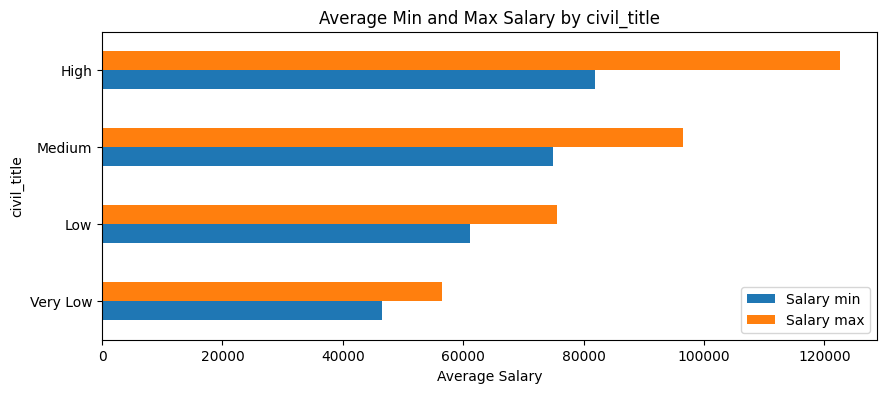

In [75]:
civil_title = df2.groupby('Civil Service Title')[['Salary min', 'Salary max']].mean()
civil_title.plot(kind='barh', figsize=(10,4))
plt.title("Average Min and Max Salary by civil_title")
plt.xlabel("Average Salary")
plt.ylabel("civil_title")
plt.show()

In [76]:
civil_title

Salary min     Salary max
Civil Service Title                             
Very Low             46446.939165   56511.534292
Low                  61157.858553   75595.760691
Medium               74925.200570   96469.583650
High                 81856.335570  122627.919271

- high means that civil service title whos , salarys are high paying as well as others .

In [77]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
3464  Others     Internal       low      Very High                High   

     Title Classification Title Code No Level  \
3464        Competitive-1         20215    02   

                               Job Category Fullorparttime  \
3464  Engineering, Architecture, & Planning              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
3464  Experienced (non-manager)     88026.0    118000.0           Annual   

                     Work Location            Division/Work Unit  \
3464  Engineering Svcs & Oversight  Engineering Svcs & Oversight   

                                        Job Description  \
3464  The New York City Housing Authority (NYCHA) is...   

                              Minimum Qual Requirements  \
3464  (1) Four (4) years of full-time, satisfactory ...   

                                       Preferred Skills  \
3464  1.\tEight plus years of experience in structur...   

                                 Additional Information  \
3464  1.\tINTERAGENCY TRANSFERS INTO NYCHA OF THOSE ...   

                     To Apply                 Residency Requirement  \
3464  Click the Apply button.  NYCHA has no residency requirements.   

     Posting Date Posting Updated Process Date  
3464   03/01/2024      03/01/2024   03/04/2024

In [78]:
df2["Title Classification"].value_counts()

Title Classification
Competitive-1               2862
Non-Competitive-5           1084
Pending Classification-2     153
Labor-3                       40
Exempt-4                      34
Name: count, dtype: int64

In [79]:
Title_Classification = df2.groupby("Title Classification")[['Salary min', 'Salary max']].mean()
Title_Classification

Salary min     Salary max
Title Classification                                 
Competitive-1             65951.468204   89860.055835
Exempt-4                  80712.470588  111738.176471
Labor-3                   35309.850000   47813.250000
Non-Competitive-5         69236.578930   86592.175793
Pending Classification-2  69545.849673   86714.267974

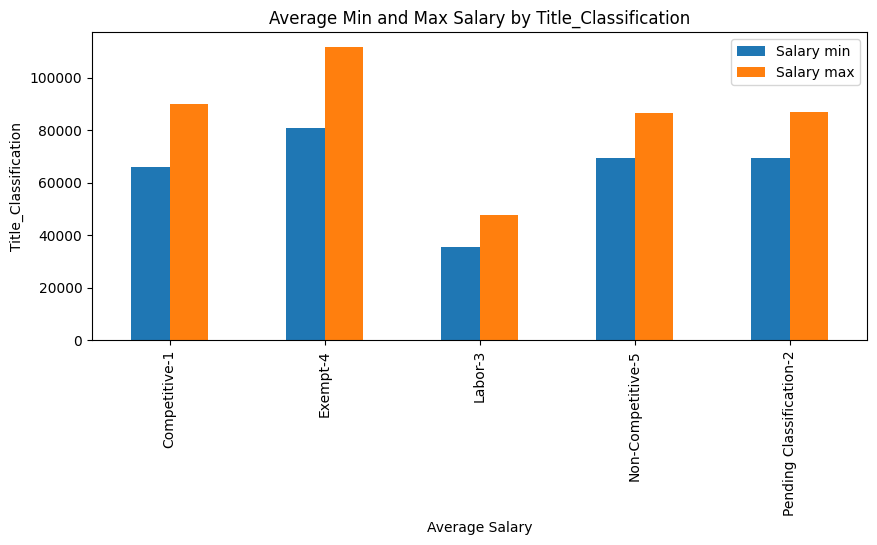

In [80]:
Title_Classification.plot(kind='bar', figsize=(10,4))
plt.title("Average Min and Max Salary by Title_Classification")
plt.xlabel("Average Salary")
plt.ylabel("Title_Classification")
plt.show()

- my analysis of the Title_Classification column shows five distinct categories with varying number of job titles. The key finding is that roles with fewer positions, such as Exempt only 34 jobs, tend to have the highest average salaries, thats mean low tilts jobs have hifh salary paying while more common categories like Competitive-1 2862 jobs offer mid-range salaries.

- For Candidates: It helps job seekers target roles in smaller, high-paying categories like Exempt-4 if they aim for better compensation, even if such roles are less frequent and more competitive.

- For Recruiters: It helps in planning recruitment strategy and salary benchmarks. For example, they can allocate higher budgets for specialized roles and understand which categories bring more applicants at standard pay levels.

In [81]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
4998  Others     Internal       low            Low                 Low   

     Title Classification Title Code No Level  \
4998    Non-Competitive-5         56058    00   

                                           Job Category Fullorparttime  \
4998  Administration & Human Resources Health Policy...              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
4998  Experienced (non-manager)     59116.0     75000.0           Annual   

          Work Location Division/Work Unit  \
4998  42-09 28th Street         HR Central   

                                        Job Description  \
4998  Established in 1805, the New York City Departm...   

                              Minimum Qual Requirements  \
4998  1. A baccalaureate degree from an accredited c...   

                                       Preferred Skills  \
4998  â¢ Experience with Welfare Management System ...   

                                 Additional Information  \
4998  Authorization to work in the United States is ...   

                                               To Apply  \
4998  Apply online with a cover letter to https://a1...   

                                  Residency Requirement Posting Date  \
4998  New York City residency is generally required ...   10/17/2023   

     Posting Updated Process Date  
4998      02/27/2024   03/04/2024

In [82]:
df2["Title Code No"].value_counts().count()

299

- Title Code No is a unique identifier assigned to each job title. While it might seem to represent the same information as the Title column, I’ll still include it in the model— but only if it shows a positive correlation with salary or other relevant features. We'll verify this during correlation analysis.

- Since the number of unique title codes is quite high, we will group them into buckets based on their average salary ranges, similar to what we did earlier with other features. This will help reduce complexity and improve model performance by making patterns easier to learn.

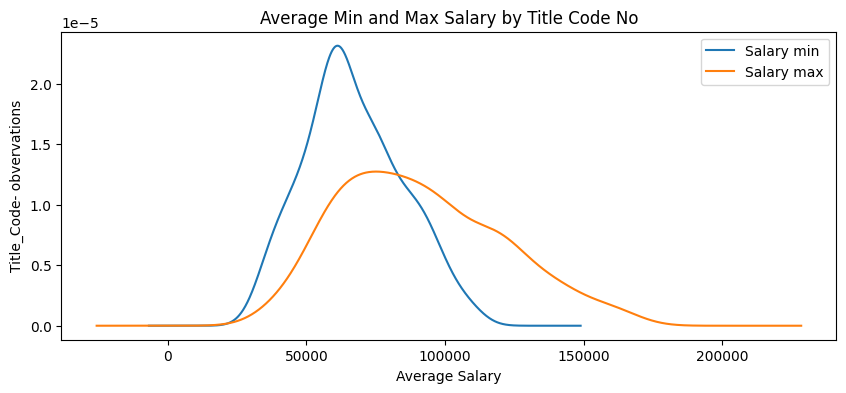

In [83]:
Title_Code = df2.groupby('Title Code No')[['Salary min', 'Salary max']].mean().sort_values("Salary max", ascending=False)
Title_Code.plot(kind="kde", figsize=(10,4))
plt.title("Average Min and Max Salary by Title Code No")
plt.xlabel("Average Salary")
plt.ylabel("Title_Code- obvervations")
plt.show()

# Important note
- I am converting these frequencies because the categories are more than 40 or 50. If they fall under this range, I will categorize them as "top N" and place the rest under "others." so needs to break into buckets for there salarys ranges.









In [84]:
Title_Code = df2.groupby('Title Code No')[['Salary min', 'Salary max']].mean()
Title_Code['Salary_Bucket'] = pd.qcut(Title_Code['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
df2['Title Code No'] = df2['Title Code No'].map(Title_Code['Salary_Bucket'])

In [85]:
df2['Title Code No'].value_counts()

Title Code No
Medium      1156
Low         1151
Very Low    1073
High         793
Name: count, dtype: int64

In [86]:
df2.groupby('Title Code No')[['Salary min', 'Salary max']].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\3751904597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('Title Code No')[['Salary min', 'Salary max']].mean()


Salary min     Salary max
Title Code No                             
Very Low       48248.170140   58868.239105
Low            63091.323197   78315.507385
Medium         76996.813149  100172.246540
High           82226.949559  127261.567213

In [87]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
2488  Others     Internal       low       Very Low            Very Low   

     Title Classification Title Code No Level  \
2488        Competitive-1      Very Low    02   

                                           Job Category Fullorparttime  \
2488  Constituent Services & Community Programs Heal...              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
2488  Experienced (non-manager)     51528.0     60088.0           Annual   

       Work Location Division/Work Unit  \
2488  30-30 47TH AVE          SH Vision   

                                        Job Description  \
2488  Established in 1805, the New York City Departm...   

                              Minimum Qual Requirements  \
2488  1. A baccalaureate degree from an accredited c...   

                                       Preferred Skills  \
2488  â¢ Experience with Welfare Management System ...   

                                 Additional Information  \
2488  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   

                                               To Apply  \
2488  Apply online with a cover letter to https://a1...   

                                  Residency Requirement Posting Date  \
2488  New York City residency is generally required ...   07/07/2023   

     Posting Updated Process Date  
2488      01/29/2024   03/04/2024

- Level: The level or rank of the position in the job also Level indicates the rank or hierarchy of a job position, so it should be treated as an ordinal feature, since it has a natural order Junior < Mid < Senior.










In [88]:
df2["Level"].value_counts()

Level
00    1659
02     969
01     655
03     554
M1      88
04      80
M2      71
M4      31
M3      31
4A      18
4B       4
1B       4
MY       4
3A       3
M5       2
Name: count, dtype: int64

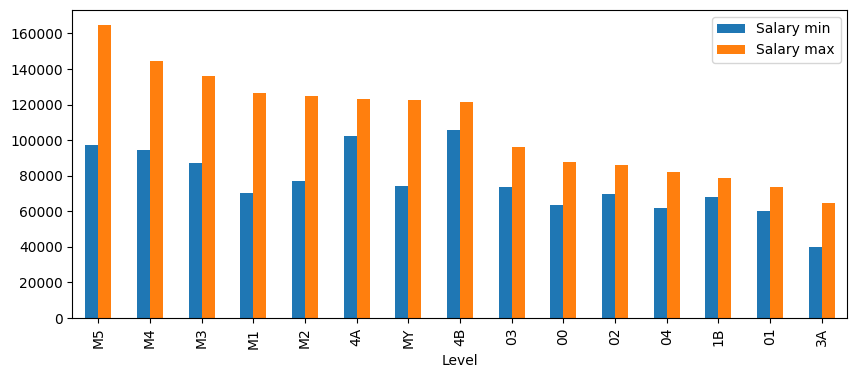

In [89]:
Level_salary = df2.groupby("Level")[["Salary min" ,"Salary max"]].mean().sort_values("Salary max", ascending=False)
Level_salary.plot(kind="bar", figsize=(10,4))
plt.show()

- I studied the salary levels and found that M5 has the highest salary range and very few jobs This means M5 is likely a senior level like a manager

- All levels show that the maximum salary is much higher than the minimum which means salary can grow with time But levels like 4A and 4B have good starting salary but the growth is not that much

- This information helps candidates understand which levels pay more and helps recruiters decide better salary ranges

In [90]:
df2.sample()

Agency Posting Type Positions Business Title  \
3295  DEPARTMENT OF TRANSPORTATION     External       low         Medium   

     Civil Service Title Title Classification Title Code No Level  \
3295                High        Competitive-1          High    00   

                       Job Category Fullorparttime               Career Level  \
3295  Technology, Data & Innovation              F  Experienced (non-manager)   

      Salary min  Salary max Salary Frequency      Work Location  \
3295    102292.0    163512.0           Annual  55 Water St Ny Ny   

     Division/Work Unit                                    Job Description  \
3295       IT & Telecom  ***IN ORDER TO BE CONSIDERED FOR THIS POSITION...   

                              Minimum Qual Requirements  \
3295  1. A master's degree from an accredited colleg...   

                                       Preferred Skills  \
3295  Candidates should have the PMP Certification i...   

                                 Additional Information  \
3295  This position may be eligible for remote work ...   

                                               To Apply  \
3295  All resumes are to be submitted electronically...   

                                  Residency Requirement Posting Date  \
3295  New York City residency is generally required ...   01/18/2024   

     Posting Updated Process Date  
3295      02/22/2024   03/04/2024

In [91]:
df2["Job Category"].value_counts()

Job Category
Engineering, Architecture, & Planning                                                                                                                                                                                       697
Social Services                                                                                                                                                                                                             329
Technology, Data & Innovation                                                                                                                                                                                               255
Finance, Accounting, & Procurement                                                                                                                                                                                          237
Legal Affairs                                                                              

In [92]:
df2["Job Category"].value_counts().count()

161

In [93]:
job_cate = df2.groupby("Job Category")[["Salary min" ,"Salary max"]].mean().sort_values("Salary max", ascending=False)
job_cate.head()  , job_cate.tail() 

(                                                    Salary min  Salary max
 Job Category                                                              
 Finance, Accounting, & Procurement Legal Affairs       74730.0    161534.0
 Administration & Human Resources Communications...     58700.0    161534.0
 Administration & Human Resources Engineering, A...     75000.0    160000.0
 Communications & Intergovernmental Affairs Engi...     58254.5    159204.0
 Constituent Services & Community Programs Healt...    108071.0    149651.0,
                                                     Salary min  Salary max
 Job Category                                                              
 Constituent Services & Community Programs Commu...     50000.0     52011.0
 Communications & Intergovernmental Affairs Lega...     51500.0     51500.0
 Constituent Services & Community Programs Commu...     39763.0     45728.0
 Administration & Human Resources Constituent Se...     36390.0     45360.0
 Health Bui

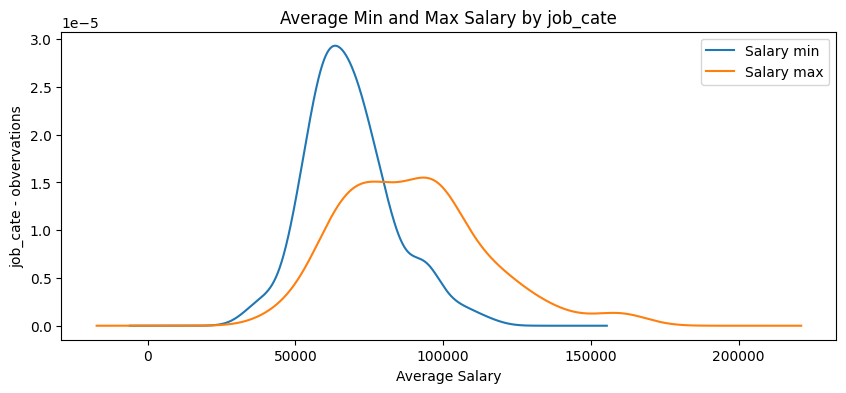

In [94]:
job_cate.plot(kind="kde", figsize=(10,4))
plt.title("Average Min and Max Salary by job_cate")
plt.xlabel("Average Salary")
plt.ylabel("job_cate - obvervations")
plt.show()

In [95]:
job_cate = df2.groupby('Job Category')[['Salary min', 'Salary max']].mean()
job_cate['Salary_Bucket'] = pd.qcut(job_cate['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
df2['Job Category'] = df2['Job Category'].map(job_cate['Salary_Bucket'])

In [96]:
df2['Job Category'].value_counts()

Job Category
Low         1669
Medium      1543
High         634
Very Low     327
Name: count, dtype: int64

In [97]:
job_cate2 = df2.groupby('Job Category')[['Salary min', 'Salary max']].mean()
job_cate2

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\4118412306.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_cate2 = df2.groupby('Job Category')[['Salary min', 'Salary max']].mean()


Salary min     Salary max
Job Category                             
Very Low      56404.467890   65495.584098
Low           61169.713337   78149.549167
Medium        70419.088788   95621.646792
High          77932.996845  111406.080126

- In the job category feature I calculated the average minimum and maximum salaries for each category then sorted them and grouped categories with similar salary ranges into a single category just like I did earlier with job titles









In [98]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
1210  Others     External       low         Medium              Medium   

     Title Classification Title Code No Level Job Category Fullorparttime  \
1210        Competitive-1        Medium    01          Low              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
1210  Experienced (non-manager)     66042.0    102646.0           Annual   

              Work Location    Division/Work Unit  \
1210  125 Worth Street, Nyc  Healthy Homes Progam   

                                        Job Description  \
1210  ONLY PERMANENT EMPLOYEES IN THE TITLE AND THOS...   

                              Minimum Qual Requirements  \
1210  1. A baccalaureate degree from an accredited c...   

                                       Preferred Skills  \
1210  This position draws on technical and scientifi...   

                                 Additional Information  \
1210  Authorization to work in the United States is ...   

                                               To Apply  \
1210  Apply online with a cover letter to https://a1...   

                                  Residency Requirement Posting Date  \
1210  New York City residency is generally required ...   02/14/2024   

     Posting Updated Process Date  
1210      02/14/2024   03/04/2024

In [99]:
df2["Fullorparttime"].value_counts()

Fullorparttime
F    4163
P      10
Name: count, dtype: int64

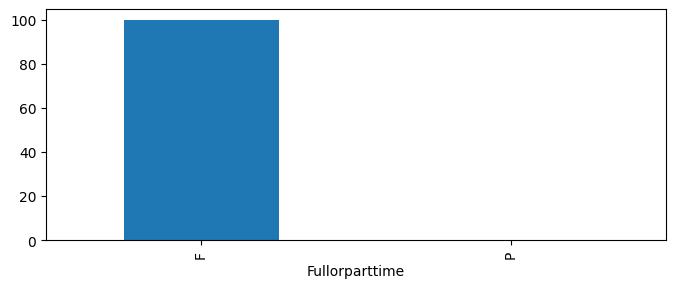

In [100]:
Fullorparttime = df2["Fullorparttime"].value_counts(normalize=True)* 100
Fullorparttime.plot(kind='bar' , figsize=(8,3))
plt.show()

In [101]:
Fullorparttime

Fullorparttime
F    99.760364
P     0.239636
Name: proportion, dtype: float64

In [102]:
Fullorparttime_avg_salary = df2.groupby("Fullorparttime")[['Salary min', 'Salary max']].mean()
Fullorparttime_avg_salary

Salary min    Salary max
Fullorparttime                            
F               66788.159635  88680.932347
P               56357.800000  84558.800000

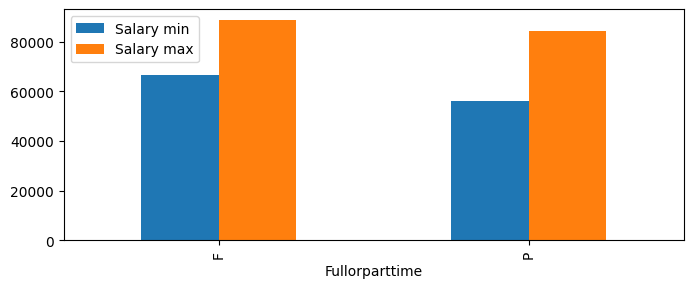

In [103]:

Fullorparttime_avg_salary.plot(kind="bar" , figsize=(8,3))
plt.show()

- Frist I can see that full-time jobs are much higher, which means candidates prefer full-time jobs the most.

- The average minimum and maximum salaries for full-time jobs are clearly higher than those for part-time jobs. This means if a candidate chooses a full-time job, they are likely to earn more compared to working part-time, htis will help candidates.

In [104]:
df2.sample()

Agency Posting Type Positions Business Title  \
888  DEPT OF DESIGN & CONSTRUCTION     External       low      Very High   

    Civil Service Title Title Classification Title Code No Level Job Category  \
888                High        Competitive-1          High    M4       Medium   

    Fullorparttime Career Level  Salary min  Salary max Salary Frequency  \
888              F      Manager     88437.0    164360.0           Annual   

                      Work Location    Division/Work Unit  \
888  30-30 Thomson Ave L I City Qns  F+P/CB+PAYMENTS/EXEC   

                                       Job Description  \
888  Hours: Full-time â 35 Hours  Work Location: ...   

                             Minimum Qual Requirements  \
888  1. A master's degree from an accredited colleg...   

                                      Preferred Skills  \
888  The ideal candidate must have the ability to m...   

                                Additional Information  \
888  Authorization to work in the United States is ...   

                        To Apply  \
888  Click the Apply Now button.   

                                 Residency Requirement Posting Date  \
888  New York City residency is generally required ...   02/28/2024   

    Posting Updated Process Date  
888      02/28/2024   03/04/2024

In [105]:
df2["Career Level"].value_counts()

Career Level
Experienced (non-manager)    3439
Entry-Level                   392
Manager                       324
Executive                      16
Student                         2
Name: count, dtype: int64

In [106]:
df2["Career Level"].value_counts(normalize=True)* 100

Career Level
Experienced (non-manager)    82.410736
Entry-Level                   9.393722
Manager                       7.764198
Executive                     0.383417
Student                       0.047927
Name: proportion, dtype: float64

In [107]:
Career_Level = df2.groupby("Career Level")[["Salary min" ,	"Salary max"]].mean().sort_values("Salary max", ascending=False)
Career_Level

Salary min     Salary max
Career Level                                          
Executive                  69681.500000  120657.250000
Manager                    79345.453704  116070.246914
Experienced (non-manager)  67463.192079   88972.504030
Student                    54272.000000   83117.000000
Entry-Level                50166.821429   62102.954082

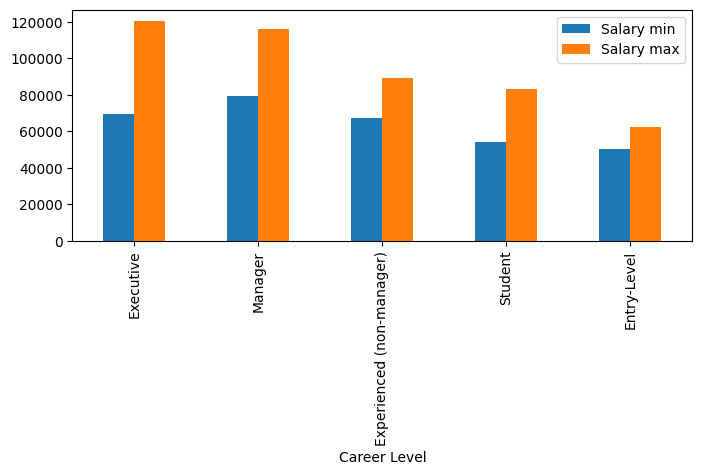

In [108]:
Career_Level.plot(kind="bar" , figsize=(8,3))
plt.show()

- From the chart, we can clearly see that Executive and Manager level jobs offer the highest average salaries — both in terms of minimum and maximum.
As the career level goes lower (like Entry-Level or Student), the average salaries decrease.

- This shows that career growth and experience play a big role in earning higher salaries.
People at higher positions (like Executive or Manager) are paid more because of their skills, responsibility, and experience.

- this analysis will help recruiters to get the idea of candidates

In [109]:

Career_Level2_Fullorparttime = df2.groupby(["Career Level" ,"Fullorparttime"])[["Salary min" ,	"Salary max"]].mean().sort_values("Salary max", ascending=False)
Career_Level2_Fullorparttime

Salary min     Salary max
Career Level              Fullorparttime                             
Executive                 F               69681.500000  120657.250000
Manager                   F               79345.453704  116070.246914
Experienced (non-manager) F               67495.578758   88985.375725
                          P               56357.800000   84558.800000
Student                   F               54272.000000   83117.000000
Entry-Level               F               50166.821429   62102.954082

- Part-time jobs are only given to Experienced (non-manager) level candidates, with an average salary between 56,357 and 84,558.This shows that companies prefer experienced candidates for part-time roles.It’s useful insight for both job seekers and recruiters.



In [110]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
2075  Others     External       low            Low                 Low   

     Title Classification Title Code No Level Job Category Fullorparttime  \
2075        Competitive-1           Low    01       Medium              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
2075  Experienced (non-manager)     55816.0     66000.0           Annual   

               Work Location           Division/Work Unit  \
2075  Law-Housing Litigation  Law Dept-Housing Litigation   

                                        Job Description  \
2075  The Special Investigations Unit (SIU) of the L...   

                              Minimum Qual Requirements  \
2075  1. A four-year high school diploma or its educ...   

                                       Preferred Skills  \
2075  1. Experience with Microsoft Office. 2. Experi...   

                                 Additional Information  \
2075  1.    Due to the existence of a civil service ...   

                     To Apply                 Residency Requirement  \
2075  Click the Apply button.  NYCHA has no residency requirements.   

     Posting Date Posting Updated Process Date  
2075   12/20/2023      12/20/2023   03/04/2024

In [111]:
df2["Salary Frequency"].value_counts()

Salary Frequency
Annual    4173
Name: count, dtype: int64

- Only one salary frequency is used Annually which clearly shows salaries are yearly. It helps candidates, HR, and adds clarity in there mind as well as for the model.









In [112]:
df2.head(1)

Agency Posting Type Positions Business Title Civil Service Title  \
0  Others     External       low           High              Medium   

  Title Classification Title Code No Level Job Category Fullorparttime  \
0    Non-Competitive-5        Medium    02          Low              F   

                Career Level  Salary min  Salary max Salary Frequency  \
0  Experienced (non-manager)     82506.0     94882.0           Annual   

       Work Location              Division/Work Unit  \
0  42-09 28th Street  Maternal, Infant, & Repr. Hlth   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   

  Posting Updated Process Date  
0      01/23/2024   03/04/2024

In [113]:
df2["Work Location"].value_counts().count()

259

In [114]:
df2["Work Location"].head()

0                 42-09 28th Street
1    30-30 Thomson Ave L I City Qns
2    30-30 Thomson Ave L I City Qns
3                 55 Water St Ny Ny
4                 42-09 28th Street
Name: Work Location, dtype: object

In [115]:
workcheck1 = df2[df2['Work Location'] == "42-09 28th Street"]
workcheck2 = df2[df2['Work Location'] == "30-30 Thomson Ave L I City Qns"]
workcheck3 = df2[df2['Work Location'] == "5 Manhattan West"]
workcheck4 = df2[df2['Work Location'] == "55 Water St Ny Ny"]

In [116]:
workcheck1.shape , workcheck2.shape , workcheck3.shape , workcheck4.shape

((285, 25), (410, 25), (99, 25), (304, 25))

In [117]:
check_work = [workcheck1 , workcheck2, workcheck3 , workcheck4]

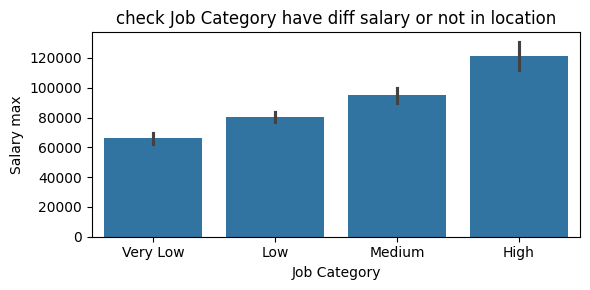

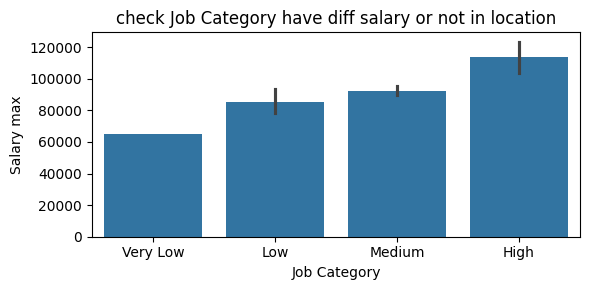

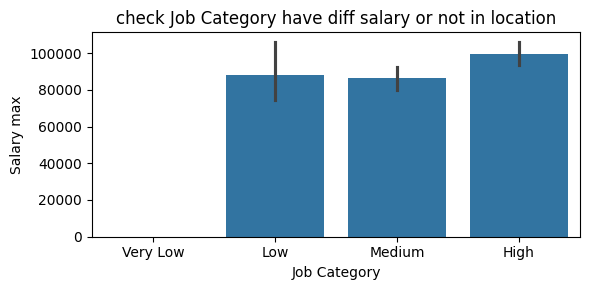

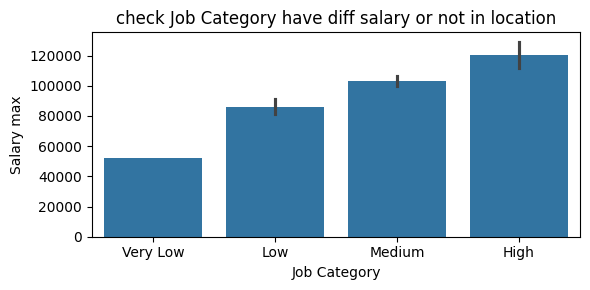

In [118]:
import numpy as np 
for i in check_work:
    plt.figure(figsize=(6,3))
    sns.barplot(data = i , x = "Job Category" , y="Salary max" ,estimator=np.mean)
    plt.title("check Job Category have diff salary or not in location")
    plt.tight_layout()
    plt.show()

- I conducted an analysis on 4 random work locations and observed that each location includes multiple job categories, each with different salary levels. This insight is valuable from a business point of view — it can help managers in location-specific hiring and budgeting decisions.However, this feature could confuse the model, as the same location can have various job titles or agencies with very different salary ranges. So, including Work Location as-is may not benefit the model.

  # note

- Instead, i plan to convert this feature into 4 salary-based buckets to reduce complexity and check its impact. Since we haven’t yet evaluated its performance or correlation after feature engineering, we will include it for now. If it turns out to have low or no positive correlation with the target variable, we will remove it during backward elimination.

In [119]:
Work_Location = df2.groupby('Work Location')[['Salary min', 'Salary max']].mean()
Work_Location['Salary_Bucket'] = pd.qcut(Work_Location['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
df2['Work Location'] = df2['Work Location'].map(Work_Location['Salary_Bucket'])

In [120]:
df2['Work Location'].value_counts()

Work Location
Medium      1928
High         953
Low          786
Very Low     506
Name: count, dtype: int64

In [121]:
df2.head(1)

Agency Posting Type Positions Business Title Civil Service Title  \
0  Others     External       low           High              Medium   

  Title Classification Title Code No Level Job Category Fullorparttime  \
0    Non-Competitive-5        Medium    02          Low              F   

                Career Level  Salary min  Salary max Salary Frequency  \
0  Experienced (non-manager)     82506.0     94882.0           Annual   

  Work Location              Division/Work Unit  \
0        Medium  Maternal, Infant, & Repr. Hlth   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   

  Posting Updated Process Date  
0      01/23/2024   03/04/2024

In [122]:
df2["Division/Work Unit"].value_counts().count()

744

In [123]:
df2["Division/Work Unit"][22]

'Fire Safety'

In [124]:
df2["Job Description"].value_counts().count()

2048

In [125]:
df2["Job Description"][33]

"Hours: Full-Time â\x80\x93 35 Hours Work Location: 30-30 Thomson Avenue, NY, 11101  Only candidates who are permanent in the Administrative Engineer title or those who are reachable on the agencyâ\x80\x99s promotional list (exam #1506), or the open-competitive list (exam #1122) may apply. Please include a copy of your Notice of Results or indicate if you are already permanent in the title. If you do not meet the previously mentioned civil service criteria, you will not be considered for an interview.  The NYC Department of Design and Construction, Division of Infrastructure seeks a Director for Section 1B. The selected candidate will be responsible for developing standard construction language, maintaining, and updating DDC's standard specifications for roadways, sewer, and water construction, and DDC's standard drawings. The Director will supervise and review the work of 3 squads of approximately 25 employees, engineers, and technicians, ensuring timely resolution of problems arising

In [126]:
df2["Additional Information"].value_counts().count()

647

In [127]:
df2["Additional Information"][3]

'The City of New York is an inclusive equal opportunity employer committed to recruiting and retaining a diverse workforce and providing a work environment that is free from discrimination and harassment based upon any legally protected status or protected characteristic, including but not limited to an individualâ\x80\x99s sex, race, color, ethnicity, national origin, age, religion, disability, sexual orientation, veteran status, gender identity or pregnancy.  As a current or prospective employee of the City of New York, you may be eligible for federal loan forgiveness programs and state repayment assistance programs.  Please review the notice to see if you may be eligible for programs and how to apply online at nyc.gov/student loans or nyc.gov/dcas.  This position is open to qualified persons with a disability who are eligible for the 55-a program.  Please indicate in your resume or cover letter that you would like to be considered for the position under the 55-a program.  * In order

In [128]:
df2["To Apply"].value_counts().count()

1098

In [129]:
df2["To Apply"][33]

'All applicants, including City Employees: Please go to NYC Government Jobs  Explore Careers  City of New York, go to Search for Open Jobs, and type in the Job ID # listed above. Submit job application as prompted. Do not apply via Employee Self-Service (ESS), e-mail, mail, or fax your resume to DDC directly.'

In [130]:
columns_to_bucket = ["Division/Work Unit", "Job Description", "Additional Information", "To Apply"]

for i in columns_to_bucket:
    temp = df2.groupby(i)[['Salary min', 'Salary max']].mean()
    temp['Salary_Bucket'] = pd.qcut(temp['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
    df2[i] = df2[i].map(temp['Salary_Bucket'])


- These columns Division/Work Unit, Job Description, Additional Information, and To Apply all provide detailed job-related information, as seen in our earlier analysis. They have high category counts and lengthy descriptions specific to each job. For now, I’m grouping them into buckets based on salary ranges. Later, if they show strong correlation with other independent features or don’t contribute meaningfully to the model, we can consider dropping them. Otherwise, they could serve as valuable factors.









In [131]:
df2.head(2)

Agency Posting Type Positions Business Title  \
0                         Others     External       low           High   
1  DEPT OF DESIGN & CONSTRUCTION     Internal       low      Very High   

  Civil Service Title Title Classification Title Code No Level Job Category  \
0              Medium    Non-Competitive-5        Medium    02          Low   
1                High        Competitive-1          High    00          Low   

  Fullorparttime               Career Level  Salary min  Salary max  \
0              F  Experienced (non-manager)     82506.0     94882.0   
1              F  Experienced (non-manager)     58682.0    134570.0   

  Salary Frequency Work Location Division/Work Unit Job Description  \
0           Annual        Medium             Medium          Medium   
1           Annual        Medium               High            High   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   
1  1. A baccalaureate degree from an accredited c...   

                                    Preferred Skills Additional Information  \
0  Experience in quantitative research methods an...                 Medium   
1  Candidates must have excellent management skil...                    Low   

  To Apply                              Residency Requirement Posting Date  \
0   Medium  New York City residency is generally required ...   01/23/2024   
1   Medium  New York City Residency is not required for th...   10/03/2023   

  Posting Updated Process Date  
0      01/23/2024   03/04/2024  
1      11/29/2023   03/04/2024

In [132]:
df2["Preferred Skills"].value_counts().count()

1364

In [133]:
df2["Preferred Skills"][33]

'Preference will be given to candidates with at least four years of strong managerial, administrative, or supervisory experience; with design experience related to infrastructure work (i.e., sewer, water mains, roadways), familiarity with troubleshoot hydraulic, geotechnical and structural issues; familiarity with NYCDOT, NYSDOT, and NYCDEP specifications and standards; familiarity with MUTCD and AASHTO; understanding of the NYC street infrastructure system; and knowledge of current and up-to-date engineering methods and standard. Excellent verbal and written communication skills, knowledge and use of computers, and proficiency in Microsoft Office applications is a must.'

In [134]:
df2["Minimum Qual Requirements"].value_counts().count()

325

In [135]:
df2["Minimum Qual Requirements"][33]

'1. A valid New York State License as a Professional Engineer and six (6) years of full-time satisfactory experience in chemical engineering, civil engineering, electrical engineering, environmental engineering, mechanical engineering, or plan examining work, at least two (2) years of which must have been in an executive, managerial, or administrative capacity.'

In [136]:
df2["Residency Requirement"].value_counts().count()

59

In [137]:
df2["Residency Requirement"].value_counts().head()

Residency Requirement
New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.    2327
New York City Residency is not required for this position                                                                                                                                                                                                                                                                                                                                                           1082
NYCHA has no residency requirements.                                                                                                                            

In [138]:
columns_to_bucket = ["Minimum Qual Requirements", "Preferred Skills"]

for i in columns_to_bucket:
    temp = df2.groupby(i)[['Salary min', 'Salary max']].mean()
    temp['Salary_Bucket'] = pd.qcut(temp['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
    df2[i] = df2[i].map(temp['Salary_Bucket'])

In [139]:
temp2 = df2.groupby('Residency Requirement')[['Salary min', 'Salary max']].mean()
temp2['Salary_Bucket'] = pd.qcut(temp2['Salary max'], q=3, labels=["Low", "Medium", "High"])
df2["Residency Requirement"] = df2["Residency Requirement"].map(temp2['Salary_Bucket'])

In [140]:
df2.sample()

Agency Posting Type Positions Business Title Civil Service Title  \
3086  Others     External       low       Very Low            Very Low   

     Title Classification Title Code No Level Job Category Fullorparttime  \
3086    Non-Competitive-5      Very Low    00          Low              F   

                   Career Level  Salary min  Salary max Salary Frequency  \
3086  Experienced (non-manager)     60000.0     60000.0           Annual   

     Work Location Division/Work Unit Job Description  \
3086        Medium           Very Low        Very Low   

     Minimum Qual Requirements Preferred Skills Additional Information  \
3086                  Very Low         Very Low                    Low   

      To Apply Residency Requirement Posting Date Posting Updated Process Date  
3086  Very Low                Medium   01/09/2024      01/09/2024   03/04/2024

- Preferred Skills and Minimum Qual Requirements are useful new columns that can work as independent features. But since they have too many categories, well group them into buckets based on salary range. They may not relate much to other features but well still check their correlation with the target later.

- Well do the same for Residency Requirement, but since it has fewer categories only 59, well divide it into just 3 salary buckets.



In [141]:
check_to = ["Work Location","Division/Work Unit","Job Description","Minimum Qual Requirements","Preferred Skills","Additional Information","To Apply","Residency Requirement"]

for i in check_to:
    print(df2.groupby(i)[['Salary min', 'Salary max']].mean().sort_values('Salary max', ascending=False))

                 Salary min     Salary max
Work Location                             
High           71762.135362  106399.987408
Medium         69136.649378   91730.995747
Low            63213.156489   77236.866412
Very Low       53818.914150   61382.578182
                      Salary min     Salary max
Division/Work Unit                             
High                78844.051843  120559.513594
Medium              72348.696051   97303.154270
Low                 63702.807531   79236.854393
Very Low            54117.007405   63396.156278
                   Salary min     Salary max
Job Description                             
High             82777.067729  127658.092430
Medium           73814.821463   96250.897561
Low              63013.500947   76681.422348
Very Low         48981.674228   57190.103456
                             Salary min     Salary max
Minimum Qual Requirements                             
High                       82493.209513  125565.527520
Medium             

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\659364393.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df2.groupby(i)[['Salary min', 'Salary max']].mean().sort_values('Salary max', ascending=False))
C:\Users\HP\AppData\Local\Temp\ipykernel_2216\659364393.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df2.groupby(i)[['Salary min', 'Salary max']].mean().sort_values('Salary max', ascending=False))
C:\Users\HP\AppData\Local\Temp\ipykernel_2216\659364393.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

In [142]:
df2.sample(2)

Agency Posting Type Positions Business Title  \
3541  FINANCIAL INFO SVCS AGENCY     Internal       low       Very Low   
63                        Others     Internal       low      Very High   

     Civil Service Title Title Classification Title Code No Level  \
3541            Very Low        Competitive-1      Very Low    01   
63                  High        Competitive-1          High    03   

     Job Category Fullorparttime               Career Level  Salary min  \
3541         High              F  Experienced (non-manager)     43392.0   
63           High              F  Experienced (non-manager)    100743.0   

      Salary max Salary Frequency Work Location Division/Work Unit  \
3541     58918.0           Annual        Medium           Very Low   
63      115854.0           Annual          High               High   

     Job Description Minimum Qual Requirements Preferred Skills  \
3541        Very Low                  Very Low         Very Low   
63              High                      High             High   

     Additional Information  To Apply Residency Requirement Posting Date  \
3541               Very Low  Very Low                Medium   07/15/2022   
63                     High      High                Medium   09/07/2023   

     Posting Updated Process Date  
3541      08/08/2022   03/04/2024  
63        12/19/2023   03/04/2024

In [143]:
df2["Process Date"].value_counts()

Process Date
03/04/2024    4173
Name: count, dtype: int64

- Process Date has almost the same value date for all rows, so it adds no value to the model and can be dropped unless it shows unexpected correlation with the target.

In [144]:
df2["Posting Updated"].value_counts() , df2["Posting Updated"].value_counts().count()

(Posting Updated
 02/27/2024    110
 02/28/2024     91
 03/01/2024     78
 02/29/2024     74
 02/14/2024     61
 02/22/2024     59
 02/21/2024     56
 02/01/2024     54
 02/26/2024     54
 02/20/2024     52
 11/28/2023     50
 03/04/2024     48
 02/23/2024     48
 08/13/2023     48
 02/15/2024     48
 01/25/2024     46
 11/06/2023     45
 01/19/2024     43
 10/06/2023     43
 01/02/2024     40
 09/29/2023     38
 01/30/2024     37
 01/22/2024     37
 01/29/2024     36
 11/27/2023     35
 01/23/2024     35
 01/31/2024     34
 02/16/2024     34
 02/06/2024     34
 01/17/2024     33
 11/09/2023     32
 02/02/2024     32
 02/08/2024     32
 12/04/2023     31
 01/16/2024     28
 12/28/2023     28
 12/13/2023     28
 09/20/2023     27
 11/29/2023     27
 02/13/2024     26
 01/27/2023     26
 12/01/2023     26
 12/19/2023     26
 01/26/2024     25
 01/09/2023     25
 11/14/2023     24
 11/30/2023     24
 01/09/2024     24
 01/18/2024     24
 02/07/2024     24
 04/23/2023     23
 01/08/2024   

In [145]:
df2["Posting Date"].value_counts()  , df2["Posting Date"].value_counts().count()

(Posting Date
 09/29/2023    76
 02/28/2024    63
 11/06/2023    62
 02/27/2024    60
 10/06/2023    57
 08/13/2023    55
 02/22/2024    54
 02/14/2024    53
 01/25/2024    52
 01/02/2024    47
 02/23/2024    47
 12/04/2023    42
 02/20/2024    40
 01/23/2024    40
 11/27/2023    39
 04/23/2023    38
 02/16/2024    37
 03/01/2024    37
 11/09/2023    36
 02/29/2024    34
 02/15/2024    34
 02/01/2024    32
 01/22/2024    31
 09/28/2023    31
 12/13/2023    30
 07/14/2023    30
 09/08/2023    30
 02/21/2024    30
 12/12/2023    30
 02/26/2024    29
 11/17/2023    29
 01/19/2024    29
 01/29/2024    28
 10/05/2023    28
 04/08/2023    28
 11/15/2023    26
 02/08/2024    26
 01/09/2023    26
 01/16/2024    26
 10/03/2023    26
 12/29/2023    26
 12/19/2023    26
 03/24/2023    26
 02/13/2024    25
 01/26/2024    25
 12/28/2023    24
 03/04/2024    24
 01/17/2024    22
 02/02/2024    22
 01/30/2024    22
 01/31/2024    22
 10/24/2023    21
 11/28/2023    21
 11/30/2023    20
 12/21/2023   

In [146]:
df2["Posting Updated"] = pd.to_datetime(df2["Posting Updated"]) 
df2["Posting Updated"] = df2["Posting Updated"].dt.month_name() 
df2["Posting Date"] = pd.to_datetime(df2["Posting Date"]) 
df2["Posting Date"] = df2["Posting Date"].dt.month_name()

In [147]:
df2.sample(2)

Agency Posting Type Positions Business Title  \
2434  DEPT OF ENVIRONMENT PROTECTION     External       low           High   
1457                          Others     Internal       low       Very Low   

     Civil Service Title Title Classification Title Code No Level  \
2434                High        Competitive-1          High    01   
1457                 Low    Non-Competitive-5           Low    00   

     Job Category Fullorparttime               Career Level  Salary min  \
2434         High              F  Experienced (non-manager)     81951.0   
1457     Very Low              F  Experienced (non-manager)     59116.0   

      Salary max Salary Frequency Work Location Division/Work Unit  \
2434    111330.0           Annual          High             Medium   
1457     64000.0           Annual        Medium           Very Low   

     Job Description Minimum Qual Requirements Preferred Skills  \
2434            High                      High             High   
1457        Very Low                       Low         Very Low   

     Additional Information  To Apply Residency Requirement Posting Date  \
2434                 Medium    Medium                Medium    September   
1457                    Low  Very Low                Medium     December   

     Posting Updated Process Date  
2434           April   03/04/2024  
1457        December   03/04/2024

- Posting Date and Posting Updated are just dates. The day itself may not help the model much, but by extracting the month, we can find salary patterns. This might show in which months jobs are posted or updated more often or have higher salaries.



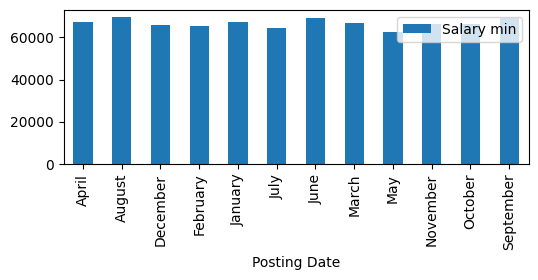

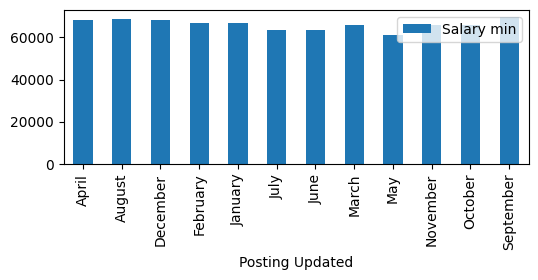

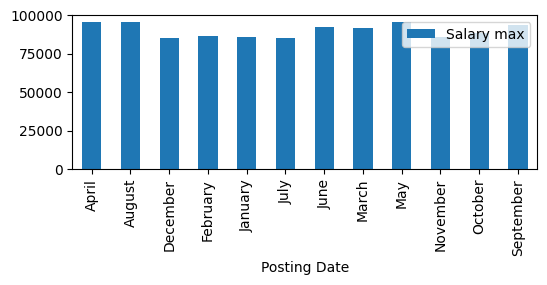

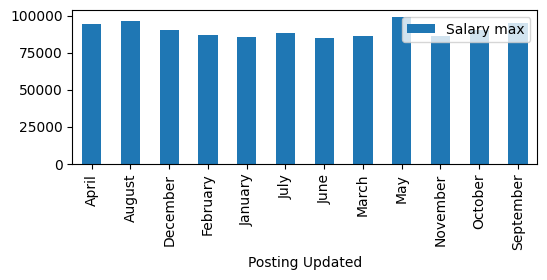

In [148]:
salarys = ["Salary min", "Salary max"]
postingmonths = ["Posting Date", "Posting Updated"]

for i in salarys:
    for j in postingmonths:
        temp3 = df2.groupby(j)[[i]].mean()
        temp3.plot(kind="bar", figsize=(6,2))
        plt.show()

- This analysis shows that there is no clear pattern between the month of job posting and the salaries. The salary values only show slight fluctuations and remain fairly close to each other across different months.

In [149]:
df2.head()

Agency Posting Type Positions Business Title  \
0                         Others     External       low           High   
1  DEPT OF DESIGN & CONSTRUCTION     Internal       low      Very High   
2  DEPT OF DESIGN & CONSTRUCTION     Internal       low           High   
3   DEPARTMENT OF TRANSPORTATION     External       low         Medium   
4                         Others     External       low           High   

  Civil Service Title Title Classification Title Code No Level Job Category  \
0              Medium    Non-Competitive-5        Medium    02          Low   
1                High        Competitive-1          High    00          Low   
2                High        Competitive-1          High    00       Medium   
3              Medium        Competitive-1           Low    02       Medium   
4              Medium    Non-Competitive-5        Medium    03          Low   

  Fullorparttime               Career Level  Salary min  Salary max  \
0              F  Experienced (non-manager)     82506.0     94882.0   
1              F  Experienced (non-manager)     58682.0    134570.0   
2              F  Experienced (non-manager)     58682.0     91405.0   
3              F  Experienced (non-manager)     50972.0     82730.0   
4              F  Experienced (non-manager)     92301.0    106146.0   

  Salary Frequency Work Location Division/Work Unit Job Description  \
0           Annual        Medium             Medium          Medium   
1           Annual        Medium               High            High   
2           Annual        Medium                Low          Medium   
3           Annual          High                Low             Low   
4           Annual        Medium             Medium          Medium   

  Minimum Qual Requirements Preferred Skills Additional Information To Apply  \
0                    Medium           Medium                 Medium   Medium   
1                      High             High                    Low   Medium   
2                      High              Low                    Low   Medium   
3                    Medium              Low                    Low      Low   
4                    Medium           Medium                    Low     High   

  Residency Requirement Posting Date Posting Updated Process Date  
0                Medium      January         January   03/04/2024  
1                Medium      October        November   03/04/2024  
2                Medium     February        February   03/04/2024  
3                Medium        April           April   03/04/2024  
4                Medium     February        February   03/04/2024

- Now, we will perform feature engineering for the model, and after that, we will check the correlation between the dependent and independent features.









In [150]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)
encoded = encoder.fit_transform(df2[[ "Posting Type", "Agency" , "Posting Type", "Posting Date", "Posting Updated" , "Fullorparttime"]])
df2 = df2.drop(columns=[ "Posting Type", "Agency" , "Posting Type", "Posting Date", "Posting Updated" , "Fullorparttime"])
df2[encoder.get_feature_names_out(["Posting Type", "Agency" , "Posting Type", "Posting Date", "Posting Updated", "Fullorparttime"])] = encoded

In [151]:
df2.sample(3)

Positions Business Title Civil Service Title Title Classification  \
4787    Medium       Very Low            Very Low        Competitive-1   
325        low       Very Low                 Low        Competitive-1   
3458       low           High                High    Non-Competitive-5   

     Title Code No Level Job Category               Career Level  Salary min  \
4787      Very Low    00         High                Entry-Level     56181.0   
325       Very Low    02         High  Experienced (non-manager)     53057.0   
3458        Medium    00         High  Experienced (non-manager)     90000.0   

      Salary max Salary Frequency Work Location Division/Work Unit  \
4787     68034.0           Annual        Medium                Low   
325      65000.0           Annual        Medium             Medium   
3458    100000.0           Annual          High             Medium   

     Job Description Minimum Qual Requirements Preferred Skills  \
4787             Low                  Very Low         Very Low   
325         Very Low                       Low         Very Low   
3458          Medium                      High           Medium   

     Additional Information  To Apply Residency Requirement Process Date  \
4787                 Medium      High                Medium   03/04/2024   
325                Very Low  Very Low                Medium   03/04/2024   
3458                    Low    Medium                Medium   03/04/2024   

      Posting Type_Internal  Agency_DEPARTMENT OF BUSINESS SERV.  \
4787                      1                                    0   
325                       0                                    0   
3458                      0                                    0   

      Agency_DEPARTMENT OF CITY PLANNING  Agency_DEPARTMENT OF INVESTIGATION  \
4787                                   0                                   0   
325                                    0                                   0   
3458                                   0                                   0   

      Agency_DEPARTMENT OF PROBATION  Agency_DEPARTMENT OF TRANSPORTATION  \
4787                               0                                    0   
325                                0                                    0   
3458                               0                                    0   

      Agency_DEPT OF DESIGN & CONSTRUCTION  \
4787                                     0   
325                                      0   
3458                                     0   

      Agency_DEPT OF ENVIRONMENT PROTECTION  \
4787                                      1   
325                                       0   
3458                                      0   

      Agency_DEPT OF YOUTH & COMM DEV SRVS  Agency_DEPT. OF HOMELESS SERVICES  \
4787                                     0                                  0   
325                                      0                                  0   
3458                                     0                                  0   

      Agency_DISTRICT ATTORNEY RICHMOND COU  \
4787                                      0   
325                                       0   
3458                                      0   

      Agency_FINANCIAL INFO SVCS AGENCY  Agency_FIRE DEPARTMENT  \
4787                                  0                       0   
325                                   1                       0   
3458                                  0                       0   

      Agency_LAW DEPARTMENT  Agency_NYC EMPLOYEES RETIREMENT SYS  \
4787                      0                                    0   
325                       0                                    0   
3458                      0                                    0   

      Agency_OFFICE OF CRIMINAL JUSTICE  Agency_OFFICE OF LABOR RELATIONS  \
4787                                  0                                 0   
325                                   0      

In [152]:
df2.isnull().sum().sum()

0

- they are nominal data types columns thats why OHE is needed and ordinal needs label encoder

In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ["Positions", "Business Title", "Civil Service Title", "Title Classification","Title Code No", "Level", "Job Category", "Career Level", "Salary Frequency","Work Location", "Division/Work Unit", "Job Description", "Minimum Qual Requirements","Preferred Skills", "Additional Information", "To Apply", "Residency Requirement","Process Date"]

for i in columns:
    df2[i] = le.fit_transform(df2[i].astype(str))

In [154]:
df2.sample(5)

Positions  Business Title  Civil Service Title  Title Classification  \
4807          2               2                    2                     0   
981           2               2                    2                     0   
1090          0               0                    2                     3   
2197          2               1                    3                     0   
1498          2               2                    1                     0   

      Title Code No  Level  Job Category  Career Level  Salary min  \
4807              2      0             1             2     70611.0   
981               1      2             2             3     74041.0   
1090              2      2             2             2     66822.0   
2197              3      0             1             2     44970.0   
1498              1      2             2             2     76000.0   

      Salary max  Salary Frequency  Work Location  Division/Work Unit  \
4807     81203.0                 0              2                   1   
981      85147.0                 0              2                   2   
1090    100434.0                 0              0                   2   
2197     75372.0                 0              1                   3   
1498     80008.0                 0              2                   1   

      Job Description  Minimum Qual Requirements  Preferred Skills  \
4807                1                          2                 1   
981                 1                          2                 1   
1090                2                          2                 2   
2197                1                          1                 1   
1498                1                          1                 1   

      Additional Information  To Apply  Residency Requirement  Process Date  \
4807                       1         1                      2             0   
981                        1         2                      2             0   
1090                       2         2                      2             0   
2197                       1         1                      2             0   
1498                       1         1                      2             0   

      Posting Type_Internal  Agency_DEPARTMENT OF BUSINESS SERV.  \
4807                      1                                    0   
981                       0                                    0   
1090                      1                                    0   
2197                      0                                    0   
1498                      1                                    0   

      Agency_DEPARTMENT OF CITY PLANNING  Agency_DEPARTMENT OF INVESTIGATION  \
4807                                   0                                   0   
981                                    0                                   0   
1090                                   0                                   0   
2197                                   0                                   0   
1498                                   0                                   0   

      Agency_DEPARTMENT OF PROBATION  Agency_DEPARTMENT OF TRANSPORTATION  \
4807                               0                                    0   
981                                0                                    0   
1090                               0                                    0   
2197                               0                                    0   
1498                               0                                    0   

      Agency_DEPT OF DESIGN & CONSTRUCTION  \
4807                                     0   
981                                      1   
1090                                     0   
2197                                     0   
1498                                     0   

      Agency_DEPT OF ENVIRONMENT PROTECTION  \
4807                                      0   
981                                       0   
1090      

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['Salary min', 'Salary max']] = scaler.fit_transform(df2[['Salary min', 'Salary max']])

In [156]:
df2.head()

Positions  Business Title  Civil Service Title  Title Classification  \
0          2               0                    2                     3   
1          2               3                    0                     0   
2          2               0                    0                     0   
3          2               2                    2                     0   
4          2               0                    2                     3   

   Title Code No  Level  Job Category  Career Level  Salary min  Salary max  \
0              2      2             1             2    0.905167    0.223639   
1              0      0             1             2   -0.464643    1.652697   
2              0      0             2             2   -0.464643    0.098442   
3              1      2             2             2   -0.907945   -0.213921   
4              2      3             1             2    1.468350    0.629226   

   Salary Frequency  Work Location  Division/Work Unit  Job Description  \
0                 0              2                   2                2   
1                 0              2                   0                0   
2                 0              2                   1                2   
3                 0              0                   1                1   
4                 0              2                   2                2   

   Minimum Qual Requirements  Preferred Skills  Additional Information  \
0                          2                 2                       2   
1                          0                 0                       1   
2                          0                 1                       1   
3                          2                 1                       1   
4                          2                 2                       1   

   To Apply  Residency Requirement  Process Date  Posting Type_Internal  \
0         2                      2             0                      0   
1         2                      2             0                      1   
2         2                      2             0                      1   
3         1                      2             0                      0   
4         0                      2             0                      0   

   Agency_DEPARTMENT OF BUSINESS SERV.  Agency_DEPARTMENT OF CITY PLANNING  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

   Agency_DEPARTMENT OF INVESTIGATION  Agency_DEPARTMENT OF PROBATION  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   Agency_DEPARTMENT OF TRANSPORTATION  Agency_DEPT OF DESIGN & CONSTRUCTION  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     1   
3                                    1                                     0   
4                                    0                                     0   

   Agency_DEPT OF ENVIRONMENT PROTECTION  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Agency_DEPT OF YOUTH & COMM DEV SRVS  Agency_DEPT. OF HOMELESS SERVICES  

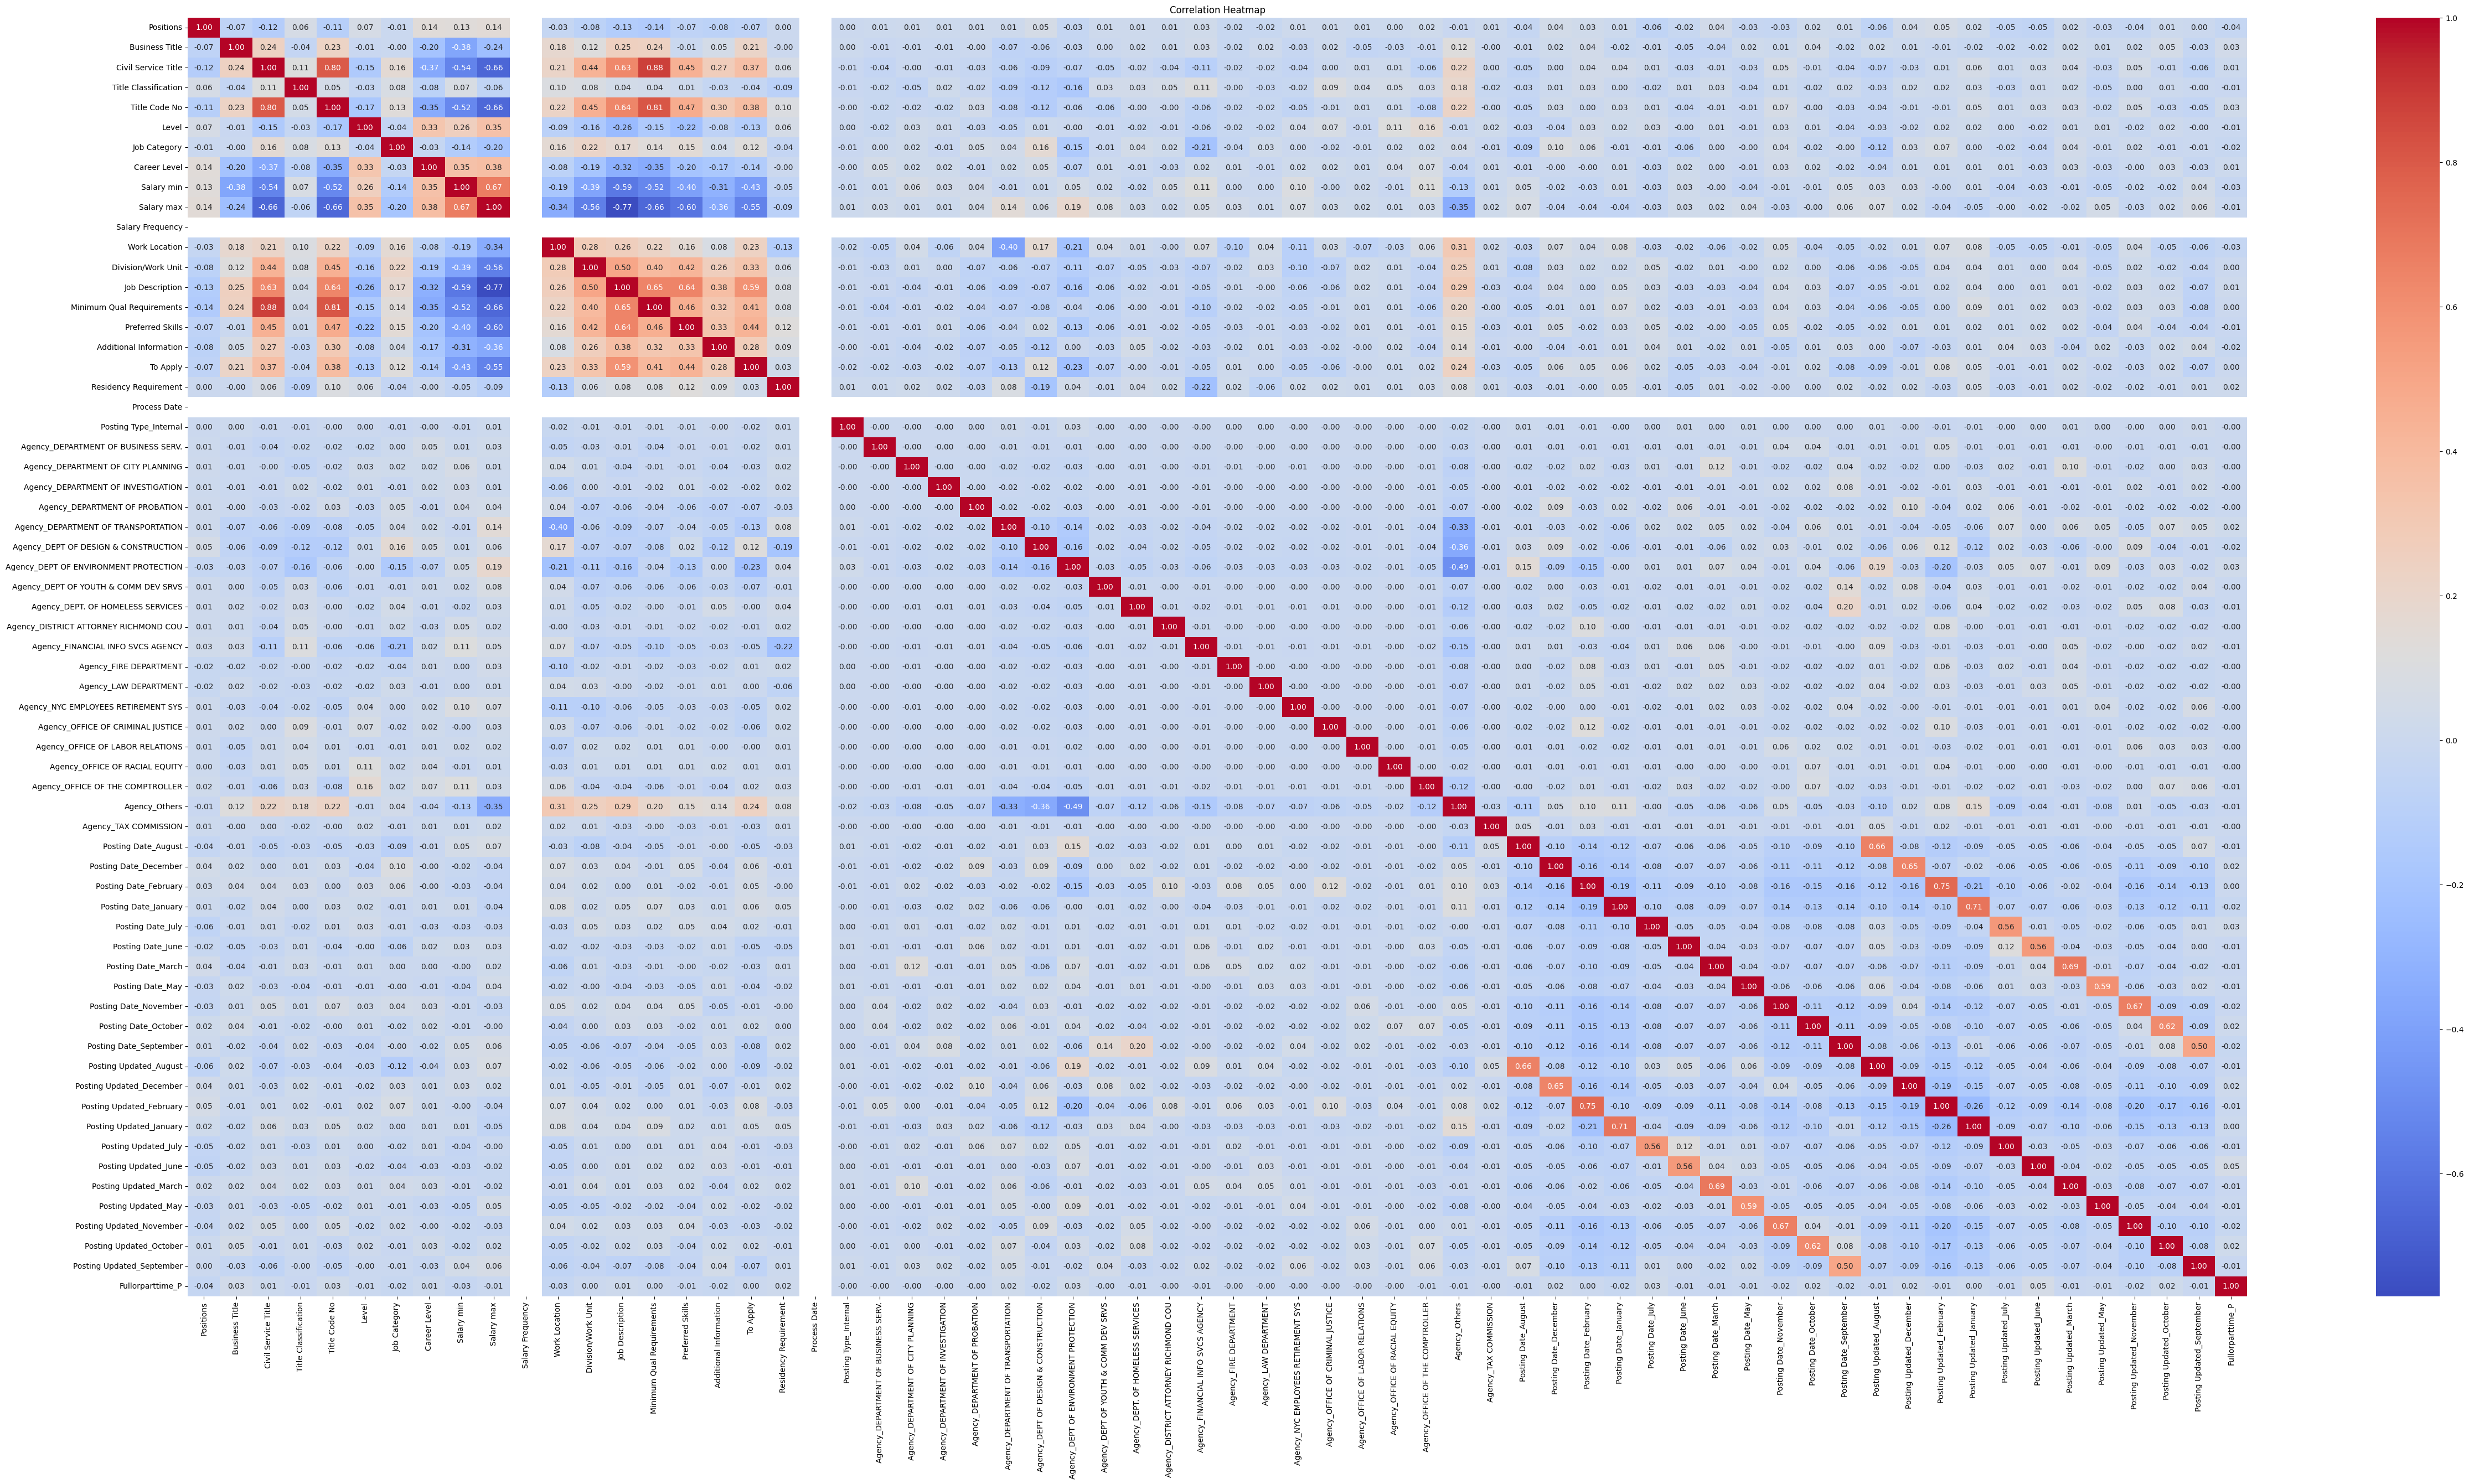

In [157]:
corr_matrix = df2.corr()
plt.figure(figsize=(60,30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Important feature selection

- In the correlation matrix heatmap, I noticed that categorical features like Salary Frequency and Process Date showed no correlation with other features or the target variable, appearing as NaN. This suggests they don’t contribute meaningful information and can be safely dropped. In general, a good independent feature should have some correlation (positive or negative) with the target variable — but not zero. Also, independent features should not be highly correlated with each other, as a correlation above 0.75 between them may lead to multicollinearity. In such cases, we should keep only the one that is more relevant to the target.

- I performed the analysis and found that both Civil Service Title and Title Code No have negative correlations with both targets. Civil Service Title has correlations of -54 and -66, while Title Code No has -52 and -66 with the targets. However, these two independent variables have a high positive correlation of 0.80 with each other, so one of them needs to be removed. Since Civil Service Title performs better in relation to one of the targets, I decided to drop Title Code No.

- I also noticed another independent feature, Minimum Qual Requirements, which has a positive correlation of 0.88 with Civil Service Title. Minimum Qual Requirements also has negative correlations with both targets (-52, -66). Since Minimum Qual Requirements still shares strong correlation with Civil Service Title, keeping it could lead to multicollinearity. Therefore, I decided to drop both Title Code No and Minimum Qual Requirements to avoid multicollinearity, as part of feature selection.

- Posting Date and Posting Updated are independent features, and both have a good relationship with the target. However, Posting Updated shows a stronger relationship with the target across some months. After performing One-Hot Encoding, the February category in both columns has a high positive correlation of 75 with each other. Removing only the February category might not be ideal, as there is still a strong correlation in other months (60s range). Therefore, it's better to drop one of the columns entirely to avoid redundancy. Since Posting Updated has a stronger correlation with both targets, I will keep it.


















In [158]:
df3 = df2.drop(columns=['Salary Frequency', 'Process Date', 'Title Code No', 'Minimum Qual Requirements','Posting Date_August', 'Posting Date_December', 'Posting Date_February', 'Posting Date_January', 'Posting Date_July','Posting Date_June','Posting Date_March','Posting Date_May','Posting Date_November','Posting Date_October','Posting Date_September'])

In [159]:
df3.head()

Positions  Business Title  Civil Service Title  Title Classification  \
0          2               0                    2                     3   
1          2               3                    0                     0   
2          2               0                    0                     0   
3          2               2                    2                     0   
4          2               0                    2                     3   

   Level  Job Category  Career Level  Salary min  Salary max  Work Location  \
0      2             1             2    0.905167    0.223639              2   
1      0             1             2   -0.464643    1.652697              2   
2      0             2             2   -0.464643    0.098442              2   
3      2             2             2   -0.907945   -0.213921              0   
4      3             1             2    1.468350    0.629226              2   

   Division/Work Unit  Job Description  Preferred Skills  \
0                   2                2                 2   
1                   0                0                 0   
2                   1                2                 1   
3                   1                1                 1   
4                   2                2                 2   

   Additional Information  To Apply  Residency Requirement  \
0                       2         2                      2   
1                       1         2                      2   
2                       1         2                      2   
3                       1         1                      2   
4                       1         0                      2   

   Posting Type_Internal  Agency_DEPARTMENT OF BUSINESS SERV.  \
0                      0                                    0   
1                      1                                    0   
2                      1                                    0   
3                      0                                    0   
4                      0                                    0   

   Agency_DEPARTMENT OF CITY PLANNING  Agency_DEPARTMENT OF INVESTIGATION  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   Agency_DEPARTMENT OF PROBATION  Agency_DEPARTMENT OF TRANSPORTATION  \
0                               0                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    1   
4                               0                                    0   

   Agency_DEPT OF DESIGN & CONSTRUCTION  \
0                                     0   
1                                     1   
2                                     1   
3                                     0   
4                                     0   

   Agency_DEPT OF ENVIRONMENT PROTECTION  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Agency_DEPT OF YOUTH & COMM DEV SRVS  Agency_DEPT. OF HOMELESS SERVICES  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Agency_DISTRICT ATTORNEY RICHMOND COU  Agency_FI

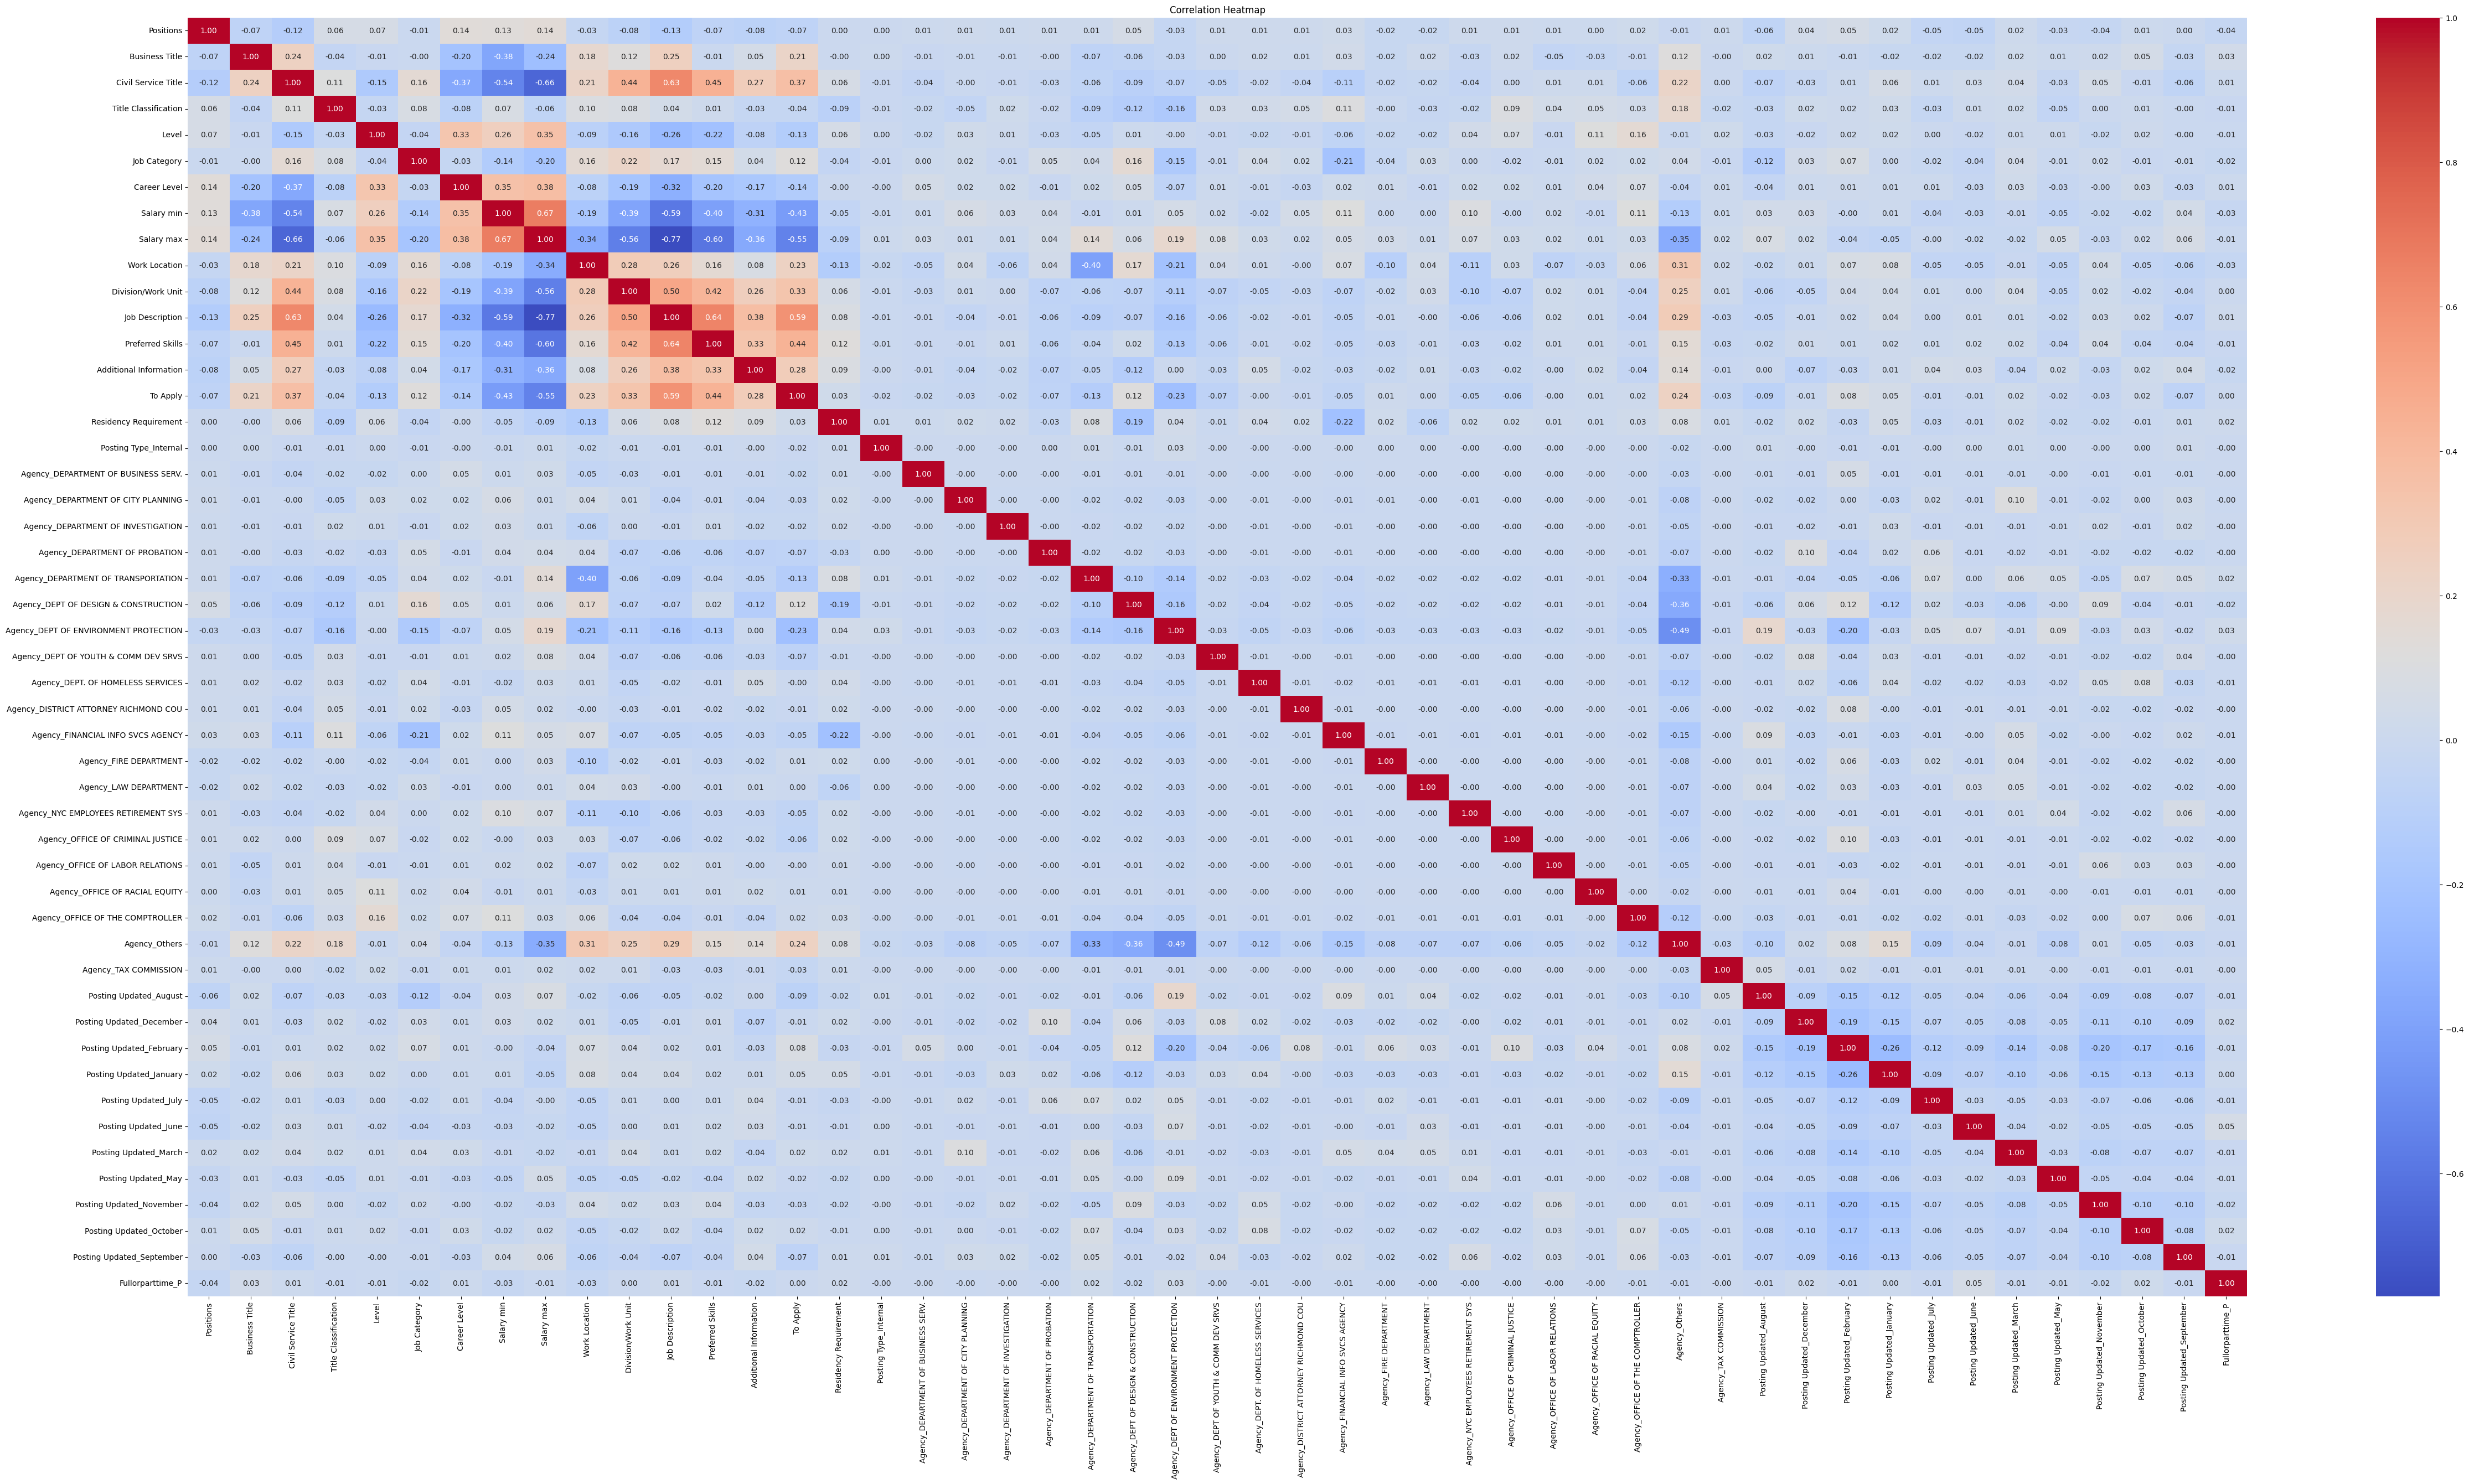

In [160]:
corr_matrix2 = df3.corr()
plt.figure(figsize=(60,30))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- All independent features now have correlations with each other below 0.75  both positive and negative  and the correlations are relatively low. However, their relationships with the dependent variables are meaningful. Therefore, the data is now clean and ready for modeling.









Now,i will divide x independent features and y taget feature

In [161]:
y = df3[['Salary min', 'Salary max']]
X = df3.drop(columns=['Salary min', 'Salary max'])

Now, i will split our data into training and testing sets to evaluate the model's performance on unseen data.

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3338, 47), (835, 47), (3338, 2), (835, 2))

Our problem is a multi-output regression task to predict both minimum and maximum salary values. We'll start with Linear Regression using a multi-output regressor. If results are not satisfactory, we’ll try more advanced models.









In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error

lrmodel = MultiOutputRegressor(LinearRegression())
lrmodel.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [164]:
y_train_predLR = lrmodel.predict(X_train)

r2_min = r2_score(y_train.values[:, 0], y_train_predLR[:, 0])
r2_max = r2_score(y_train.values[:, 1], y_train_predLR[:, 1])

n = X_train.shape[0]
p = X_train.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)
print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)

R2 Score for Salary Min: 0.5237980527748973
Adjusted R2 for Salary Min: 0.5169951678145387

R2 Score for Salary Max: 0.7411854390199415
Adjusted R2 for Salary Max: 0.7374880881487977


In [165]:
y_test_predLR = lrmodel.predict(X_test)

r2_min = r2_score(y_test.values[:, 0], y_test_predLR[:, 0])
r2_max = r2_score(y_test.values[:, 1], y_test_predLR[:, 1])

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y_test.iloc[:, 0], y_test_predLR[:, 0])
mse_max = mean_squared_error(y_test.iloc[:, 1], y_test_predLR[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)
print("MSE for Salary Min:", mse_min)
print("RMSE for Salary Min:", rmse_min)

print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)
print("MSE for Salary Max:", mse_max)
print("RMSE for Salary Max:", rmse_max)

R2 Score for Salary Min: 0.5217177163549434
Adjusted R2 for Salary Min: 0.4931544795934215
MSE for Salary Min: 0.4892861854268607
RMSE for Salary Min: 0.6994899466231524

R2 Score for Salary Max: 0.7669866148618741
Adjusted R2 for Salary Max: 0.7530709489133457
MSE for Salary Max: 0.2520027205261453
RMSE for Salary Max: 0.5019987256220332


In [166]:
from sklearn.model_selection import cross_val_score
cv_scores_min = cross_val_score(lrmodel.estimators_[0], X_train, y_train.iloc[:, 0], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Min: {cv_scores_min}")
print(f"Mean R² for Salary Min: {cv_scores_min.mean():.4f}")

cv_scores_max = cross_val_score(lrmodel.estimators_[1], X_train, y_train.iloc[:, 1], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Max: {cv_scores_max}")
print(f"Mean R² for Salary Max: {cv_scores_max.mean():.4f}")

Cross-Validation R² Scores for Salary Min: [0.53048055 0.49477878 0.51863304 0.51138739 0.44502693]
Mean R² for Salary Min: 0.5001
Cross-Validation R² Scores for Salary Max: [0.74709866 0.70101299 0.72844215 0.75426733 0.72241998]
Mean R² for Salary Max: 0.7306




- On the test data, the model achieved an R² score of 0.52 and an adjusted R² of 0.49 for Salary Min, with an RMSE of 0.70. These scores are quite close to the training performance, showing only a 3% drop, which indicates that the model is not overfitting and is learning reasonably well. For Salary Max, the model performed even better, achieving an R² score of 0.77 and an adjusted R² of 0.75, with a lower RMSE of 0.50—surpassing its training performance and suggesting that the model generalizes very well for predicting maximum salary.


- Overall, the model shows moderate performance for Salary Min and strong, reliable performance for Salary Max, making it a decent baseline model.

  # note 

- Now to improve the performance my plan to try other models also do hyperparameter tunning .But before that i use the original full dataset as a validation set, which contains outliers and noise.If a model performs well on this noisy validation data, it means it is robust and can handle real-world unpredictability.So,i test every model on this noisy validation set, and the one that gives the best score on it will be considered your best model.


# Prepare Validation Data for Model 





In [167]:
def convert_data_into_validationset(data):
    col_drop = ["Job ID","Minimum Qual Requirements","Title Code No","Posting Date","Process Date","Salary Frequency"]
    data = data.drop(columns=col_drop , errors='ignore')

    cols_buckets_in_4 = ["Positions","Business Title","Civil Service Title","Job Category", "Work Location","Division/Work Unit"	,"Job Description",	"Preferred Skills"	,"Additional Information",	"To Apply"]
    for i in cols_buckets_in_4:
        temp = data.groupby(i)[['Salary min', 'Salary max']].mean()
        temp['Salary_Bucket'] = pd.qcut(temp['Salary max'], q=4, labels=["Very Low", "Low", "Medium", "High"])
        data[i] = data[i].map(temp['Salary_Bucket'])

    temp = data.groupby("Residency Requirement")[['Salary min', 'Salary max']].mean()
    temp['Salary_Bucket'] = pd.qcut(temp['Salary max'], q=3, labels=["Low", "Medium", "High"])
    data["Residency Requirement"] = data["Residency Requirement"].map(temp['Salary_Bucket'])

    cols_buckets = ["Title Classification",	"Career Level","Level",	"Residency Requirement","Positions","Business Title","Civil Service Title","Job Category", "Work Location","Division/Work Unit"	,"Job Description",	"Preferred Skills"	,"Additional Information",	"To Apply"]
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for i in cols_buckets:
        data[i] = le.fit_transform(data[i].astype(str))

    data["Posting Updated"] = pd.to_datetime(data["Posting Updated"]) 
    data["Posting Updated"] = data["Posting Updated"].dt.month_name() 
    
    agency_salary = data.groupby("Agency")[["Salary min", "Salary max"]].mean().sort_values("Salary max", ascending=False)
    Agencys = ["DEPT OF ENVIRONMENT PROTECTION", "DEPT OF DESIGN & CONSTRUCTION", "DEPARTMENT OF TRANSPORTATION", "FINANCIAL INFO SVCS AGENCY", "ADMIN FOR CHILDREN'S SVCS", "OFFICE OF THE COMPTROLLER", "DEPT. OF HOMELESS SERVICES", "DEPARTMENT OF CITY PLANNING", "FIRE DEPARTMENT", "NYC EMPLOYEES RETIREMENT SYS", "DEPARTMENT OF PROBATION", "LAW DEPARTMENT", "DEPT OF YOUTH & COMM DEV SRVS", "DISTRICT ATTORNEY RICHMOND COU", "OFFICE OF CRIMINAL JUSTICE", "DEPARTMENT OF INVESTIGATION", "OFFICE OF LABOR RELATIONS", "DEPARTMENT OF BUSINESS SERV.", "TAX COMMISSION", "OFFICE OF RACIAL EQUITY"]
    data["Agency"] = data["Agency"].apply(lambda x: x if x in Agencys else "Others")   

    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)
    encoded = encoder.fit_transform(data[[ "Posting Type", "Agency" ,  "Posting Updated" , "Fullorparttime"]])
    data = data.drop(columns=[ "Posting Type", "Agency" ,"Posting Updated" , "Fullorparttime"])
    data[encoder.get_feature_names_out(["Posting Type", "Agency" , "Posting Updated", "Fullorparttime"])] = encoded

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[['Salary min', 'Salary max']] = scaler.fit_transform(data[['Salary min', 'Salary max']])
    
    return data

In [168]:
validationdata = convert_data_into_validationset(data)

In [169]:
validationdata.head()

Positions  Business Title  Civil Service Title  Title Classification  \
0          0               2                    2                     3   
1          0               0                    0                     0   
2          0               2                    0                     0   
3          0               1                    2                     0   
4          0               2                    2                     3   

   Level  Job Category  Career Level  Salary min  Salary max  Work Location  \
0      2             3             2    0.569244    0.106441              2   
1      0             1             2   -0.189562    0.955955              2   
2      0             2             2   -0.189562    0.032017              2   
3      2             2             2   -0.435130   -0.153670              2   
4      3             3             2    0.881220    0.347545              2   

   Division/Work Unit  Job Description  Preferred Skills  \
0                   1                2                 2   
1                   0                0                 0   
2                   1                2                 1   
3                   3                1                 1   
4                   2                2                 2   

   Additional Information  To Apply  Residency Requirement  \
0                       2         2                      2   
1                       1         2                      2   
2                       1         1                      2   
3                       1         1                      2   
4                       1         2                      2   

   Posting Type_Internal  Agency_DEPARTMENT OF BUSINESS SERV.  \
0                      0                                    0   
1                      1                                    0   
2                      1                                    0   
3                      0                                    0   
4                      0                                    0   

   Agency_DEPARTMENT OF CITY PLANNING  Agency_DEPARTMENT OF INVESTIGATION  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   Agency_DEPARTMENT OF PROBATION  Agency_DEPARTMENT OF TRANSPORTATION  \
0                               0                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    1   
4                               0                                    0   

   Agency_DEPT OF DESIGN & CONSTRUCTION  \
0                                     0   
1                                     1   
2                                     1   
3                                     0   
4                                     0   

   Agency_DEPT OF ENVIRONMENT PROTECTION  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Agency_DEPT OF YOUTH & COMM DEV SRVS  Agency_DEPT. OF HOMELESS SERVICES  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Agency_DISTRICT ATTORNEY RICHMOND COU  Agency_FI

In [170]:
validationdata.isnull().sum().sum()

0

In [171]:
validationdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5101 entries, 0 to 5119
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Positions                              5101 non-null   int32  
 1   Business Title                         5101 non-null   int32  
 2   Civil Service Title                    5101 non-null   int32  
 3   Title Classification                   5101 non-null   int32  
 4   Level                                  5101 non-null   int32  
 5   Job Category                           5101 non-null   int32  
 6   Career Level                           5101 non-null   int32  
 7   Salary min                             5101 non-null   float64
 8   Salary max                             5101 non-null   float64
 9   Work Location                          5101 non-null   int32  
 10  Division/Work Unit                     5101 non-null   int32  
 11  Job Descr

In [172]:
df3.head()

Positions  Business Title  Civil Service Title  Title Classification  \
0          2               0                    2                     3   
1          2               3                    0                     0   
2          2               0                    0                     0   
3          2               2                    2                     0   
4          2               0                    2                     3   

   Level  Job Category  Career Level  Salary min  Salary max  Work Location  \
0      2             1             2    0.905167    0.223639              2   
1      0             1             2   -0.464643    1.652697              2   
2      0             2             2   -0.464643    0.098442              2   
3      2             2             2   -0.907945   -0.213921              0   
4      3             1             2    1.468350    0.629226              2   

   Division/Work Unit  Job Description  Preferred Skills  \
0                   2                2                 2   
1                   0                0                 0   
2                   1                2                 1   
3                   1                1                 1   
4                   2                2                 2   

   Additional Information  To Apply  Residency Requirement  \
0                       2         2                      2   
1                       1         2                      2   
2                       1         2                      2   
3                       1         1                      2   
4                       1         0                      2   

   Posting Type_Internal  Agency_DEPARTMENT OF BUSINESS SERV.  \
0                      0                                    0   
1                      1                                    0   
2                      1                                    0   
3                      0                                    0   
4                      0                                    0   

   Agency_DEPARTMENT OF CITY PLANNING  Agency_DEPARTMENT OF INVESTIGATION  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   Agency_DEPARTMENT OF PROBATION  Agency_DEPARTMENT OF TRANSPORTATION  \
0                               0                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    1   
4                               0                                    0   

   Agency_DEPT OF DESIGN & CONSTRUCTION  \
0                                     0   
1                                     1   
2                                     1   
3                                     0   
4                                     0   

   Agency_DEPT OF ENVIRONMENT PROTECTION  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Agency_DEPT OF YOUTH & COMM DEV SRVS  Agency_DEPT. OF HOMELESS SERVICES  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Agency_DISTRICT ATTORNEY RICHMOND COU  Agency_FI

In [173]:
X2 = validationdata.drop(columns=["Salary min", "Salary max"])
y2 = validationdata[["Salary min", "Salary max"]]

In [174]:
y_validation_predLR = lrmodel.predict(X2)

r2_min = r2_score(y2.values[:, 0], y_validation_predLR[:, 0])
r2_max = r2_score(y2.values[:, 1], y_validation_predLR[:, 1])

n = X2.shape[0]
p = X2.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y2.iloc[:, 0], y_validation_predLR[:, 0])
mse_max = mean_squared_error(y2.iloc[:, 1], y_validation_predLR[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score validationdata for Salary Min:", r2_min)
print("Adjustedvalidationdata R2 for Salary Min:", adj_r2_min)
print("MSE validationdata for Salary Min:", mse_min)
print("RMSE validationdata for Salary Min:", rmse_min)

print("\nR2 validationdata Score for Salary Max:", r2_max)
print("Adjusted R2  validationdata for Salary Max:", adj_r2_max)
print("MSE validationdata for Salary Max:", mse_max)
print("RMSE validationdata  for Salary Max:", rmse_max)

R2 Score validationdata for Salary Min: 0.41207241762860314
Adjustedvalidationdata R2 for Salary Min: 0.4066038650120475
MSE validationdata for Salary Min: 0.5879275823713969
RMSE validationdata for Salary Min: 0.7667643590904554

R2 validationdata Score for Salary Max: 0.7074916413710326
Adjusted R2  validationdata for Salary Max: 0.7047709026305693
MSE validationdata for Salary Max: 0.29250835862896746
RMSE validationdata  for Salary Max: 0.5408404188196065


- i will compare this score from test data 

For Salary Min, the R² score on the validation data is 0.41 and Adjusted R² is 0.40, which is significantly lower than the test data (0.52). This means the model has made slightly more errors while predicting Salary Min on the validation data.

The MSE is 0.59 and RMSE is 0.77, which are higher than the test data (MSE was 0.70 and RMSE was 0.50). This indicates that the model's prediction accuracy has decreased on the validation set.

For Salary Max, the R² score on the validation data is 0.71 and Adjusted R² is 0.70, which is lower than the test data (0.77). There's a slight drop, but the model still performs reasonably well on the validation data.

The MSE is 0.29 and RMSE is 0.54 on the validation data, which is a bit higher than the test data (RMSE was 0.50).

Overall, the model performs well for Salary Max on the validation data, but underperforms for Salary Min. The model's performance has slightly dropped on the validation data compared to the test data, possibly due to noise and outliers.

- Now, I will try other models, tune hyperparameters, and compare them with this model's performance on the validation set to improve accuracy.









In [175]:
from sklearn.ensemble import RandomForestRegressor

rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [176]:
y_train_predrf = rf_model.predict(X_train)

r2_min = r2_score(y_train.values[:, 0], y_train_predrf[:, 0])
r2_max = r2_score(y_train.values[:, 1], y_train_predrf[:, 1])

n = X_train.shape[0]
p = X_train.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

print("R2 Score rf_model for Salary Min:", r2_min)
print("Adjusted R2 rf_model for Salary Min:", adj_r2_min)
print("\nR2 Score rf_model for Salary Max:", r2_max)
print("Adjusted R2 rf_model for Salary Max:", adj_r2_max)

R2 Score rf_model for Salary Min: 0.9791129226152658
Adjusted R2 rf_model for Salary Min: 0.9788145357954839

R2 Score rf_model for Salary Max: 0.9941201870883895
Adjusted R2 rf_model for Salary Max: 0.9940361897610808


In [177]:
y_test_predrf = rf_model.predict(X_test)

r2_min = r2_score(y_test.values[:, 0], y_test_predrf[:, 0])
r2_max = r2_score(y_test.values[:, 1], y_test_predrf[:, 1])

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y_test.iloc[:, 0], y_test_predrf[:, 0])
mse_max = mean_squared_error(y_test.iloc[:, 1], y_test_predrf[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)
print("MSE for Salary Min:", mse_min)
print("RMSE for Salary Min:", rmse_min)

print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)
print("MSE for Salary Max:", mse_max)
print("RMSE for Salary Max:", rmse_max)

R2 Score for Salary Min: 0.9021361190962233
Adjusted R2 for Salary Min: 0.8962916433624526
MSE for Salary Min: 0.10011544775096218
RMSE for Salary Min: 0.3164102522848496

R2 Score for Salary Max: 0.9797755263761907
Adjusted R2 for Salary Max: 0.9785677115600293
MSE for Salary Max: 0.02187265925254908
RMSE for Salary Max: 0.14789408119512112


In [178]:
cv_scores_min = cross_val_score(rf_model.estimators_[0], X_train, y_train.iloc[:, 0], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Min: {cv_scores_min}")
print(f"Mean R² for Salary Min: {cv_scores_min.mean():.4f}")

cv_scores_max = cross_val_score(rf_model.estimators_[1], X_train, y_train.iloc[:, 1], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Max: {cv_scores_max}")
print(f"Mean R² for Salary Max: {cv_scores_max.mean():.4f}")

Cross-Validation R² Scores for Salary Min: [0.86025395 0.87198834 0.8448144  0.89259769 0.831955  ]
Mean R² for Salary Min: 0.8603
Cross-Validation R² Scores for Salary Max: [0.96078976 0.96521477 0.96031764 0.96755332 0.96354501]
Mean R² for Salary Max: 0.9635


- I will first trained a default Random Forest model. On the training data, it performed exceptionally well with an R² score of 0.9791 and Adjusted R² of 0.9788 for Salary Min, and 0.9941 R² with 0.9940 Adjusted R² for Salary Max. These scores were much higher than those from the linear regression model, indicating that Random Forest captured the patterns well but such high scores also raise a concern about potential overfitting.

- To test generalization, I evaluated it on the test data. For Salary Min, R² dropped to 0.9021 and Adjusted R² to 0.8962, while for Salary Max, the R² dropped slightly to 0.9798 and Adjusted R² to 0.9786. This shows a small variance (around 2%) for Salary Max, but a larger one (~8%) for Salary Min. Cross-validation scores further confirmed this: Salary Min had a mean R² of 0.8603, and Salary Max had a strong mean R² of 0.9635, indicating that the model is overall good but slightly overfitting on Salary Min. Hyperparameter tuning will be the next step to reduce this variance.

In [194]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "estimator__n_estimators": [100, 120 ,140],
    "estimator__max_depth": [8 , 9 , 10],
    "estimator__min_samples_split": [6 ,8 ,10],
    "estimator__min_samples_leaf": [5 ,6 ,7]
}

base_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=5,
                                                     min_samples_split=6,
                                                     random_state=42))

In [195]:
print(grid_search.best_params_)

{'estimator__max_depth': 10, 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 6, 'estimator__n_estimators': 100}


In [196]:
rf_model2 = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=6,min_samples_leaf=5,random_state=42))

rf_model2.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=5,
                                                     min_samples_split=6,
                                                     random_state=42))

In [197]:
y_train_predrf2 = rf_model2.predict(X_train)

r2_min = r2_score(y_train.values[:, 0], y_train_predrf2[:, 0])
r2_max = r2_score(y_train.values[:, 1], y_train_predrf2[:, 1])

n = X_train.shape[0]
p = X_train.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

print("R2 Score rf_model for Salary Min:", r2_min)
print("Adjusted R2 rf_model for Salary Min:", adj_r2_min)
print("\nR2 Score rf_model for Salary Max:", r2_max)
print("Adjusted R2 rf_model for Salary Max:", adj_r2_max)

R2 Score rf_model for Salary Min: 0.8574995841800512
Adjusted R2 rf_model for Salary Min: 0.8554638639540519

R2 Score rf_model for Salary Max: 0.9677054641360486
Adjusted R2 rf_model for Salary Max: 0.9672441136237064


In [198]:
y_test_predrf2 = rf_model2.predict(X_test)

r2_min = r2_score(y_test.values[:, 0], y_test_predrf2[:, 0])
r2_max = r2_score(y_test.values[:, 1], y_test_predrf2[:, 1])

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y_test.iloc[:, 0], y_test_predrf2[:, 0])
mse_max = mean_squared_error(y_test.iloc[:, 1], y_test_predrf2[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)
print("MSE for Salary Min:", mse_min)
print("RMSE for Salary Min:", rmse_min)

print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)
print("MSE for Salary Max:", mse_max)
print("RMSE for Salary Max:", rmse_max)

R2 Score for Salary Min: 0.8042586485043635
Adjusted R2 for Salary Min: 0.7925688854544335
MSE for Salary Min: 0.20024479784970228
RMSE for Salary Min: 0.44748720411839965

R2 Score for Salary Max: 0.9556198005505807
Adjusted R2 for Salary Max: 0.9529693947384807
MSE for Salary Max: 0.047996946579343454
RMSE for Salary Max: 0.21908205444386233


In [199]:
cv_scores_min = cross_val_score(rf_model2.estimators_[0], X_train, y_train.iloc[:, 0], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Min: {cv_scores_min}")
print(f"Mean R² for Salary Min: {cv_scores_min.mean():.4f}")

cv_scores_max = cross_val_score(rf_model2.estimators_[1], X_train, y_train.iloc[:, 1], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Max: {cv_scores_max}")
print(f"Mean R² for Salary Max: {cv_scores_max.mean():.4f}")

Cross-Validation R² Scores for Salary Min: [0.79801433 0.79741332 0.78040851 0.81582754 0.71572279]
Mean R² for Salary Min: 0.7815
Cross-Validation R² Scores for Salary Max: [0.94961786 0.9515073  0.94639818 0.95322424 0.9463481 ]
Mean R² for Salary Max: 0.9494


- After tuning the Random Forest model, the training R² for Salary Min dropped to 0.8575 (Adjusted R²: 0.8555) and for Salary Max to 0.9677 (Adjusted R²: 0.9672). While the train scores are slightly lower than those from the default model, this indicates reduced overfitting. On the test data, the model achieved an R² of 0.8043 (Adjusted R²: 0.7926) for Salary Min and 0.9556 (Adjusted R²: 0.9530) for Salary Max. Compared to the default model, the drop in R² for Salary Max was just 1%, down from 2%, and for Salary Min, the drop reduced to 6%, from the earlier 8%. This means the model is generalizing better now, especially for Salary Min.

- The cross-validation results further confirm this improvement. Salary Min achieved a mean R² of 0.7815, and Salary Max had a strong mean R² of 0.9494 — both scores are closely aligned with their respective test R² values, indicating minimal variance. Your observation is correct: although the training accuracy dropped a bit, the variance between training and testing decreased, which is a clear sign of reduced overfitting and better generalization performance.

- now i will see'the validation data score in rf_model2 and compare with lrmodel 

In [200]:
y_validation_predrf2 = rf_model2.predict(X2)

r2_min = r2_score(y2.values[:, 0], y_validation_predrf2[:, 0])
r2_max = r2_score(y2.values[:, 1], y_validation_predrf2[:, 1])

n = X2.shape[0]
p = X2.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y2.iloc[:, 0], y_validation_predrf2[:, 0])
mse_max = mean_squared_error(y2.iloc[:, 1], y_validation_predrf2[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score validationdata for Salary Min:", r2_min)
print("Adjustedvalidationdata R2 for Salary Min:", adj_r2_min)
print("MSE validationdata for Salary Min:", mse_min)
print("RMSE validationdata for Salary Min:", rmse_min)

print("\nR2 validationdata Score for Salary Max:", r2_max)
print("Adjusted R2  validationdata for Salary Max:", adj_r2_max)
print("MSE validationdata for Salary Max:", mse_max)
print("RMSE validationdata  for Salary Max:", rmse_max)

R2 Score validationdata for Salary Min: 0.5594029392864297
Adjustedvalidationdata R2 for Salary Min: 0.5553047675362738
MSE validationdata for Salary Min: 0.44059706071357024
RMSE validationdata for Salary Min: 0.6637748569459152

R2 validationdata Score for Salary Max: 0.7876674482193935
Adjusted R2  validationdata for Salary Max: 0.7856924571381173
MSE validationdata for Salary Max: 0.21233255178060653
RMSE validationdata  for Salary Max: 0.4607955639767016


- After tuning, the Random Forest model performs better than the Linear Regression model on the validation data. For Salary Min, the R² score improved from 0.41 to 0.56, and for Salary Max, it went up from 0.71 to 0.79. This shows that the Random Forest model is generalizing better and not overfitting. Its scores are also close to cross-validation results, which confirms that the model is stable.

- Because of this improvement, especially in Salary Min where the score jumped by over 14%, and in Salary Max by around 8%, the Random Forest model is clearly better than Linear Regression. Now, I’ll try other algorithms to see if any can perform even better on the validation set, without causing overfitting or large gaps between train and test results.









In [201]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    "estimator__n_estimators": [100, 110 ,120],
    "estimator__learning_rate": [0.05, 0.1, 0.01],
    "estimator__max_depth": [3 ,4, 5],
    "estimator__min_samples_split": [4,5 , 6],
    "estimator__min_samples_leaf": [3 ,4]
}

base_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=5,
                                                         min_samples_leaf=3,
                                                         min_samples_split=4,
                                                         n_estimators=120,
                                                         random_state=42))

In [202]:
 print(grid_search.best_params_)

{'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 3, 'estimator__min_samples_split': 4, 'estimator__n_estimators': 120}


In [203]:
gb_model = MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=3,min_samples_split=4,n_estimators=120,random_state=42))

gb_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=5,
                                                         min_samples_leaf=3,
                                                         min_samples_split=4,
                                                         n_estimators=120,
                                                         random_state=42))

In [204]:
y_train_predgb2 = gb_model.predict(X_train)

r2_min = r2_score(y_train.values[:, 0], y_train_predgb2[:, 0])
r2_max = r2_score(y_train.values[:, 1], y_train_predgb2[:, 1])

n = X_train.shape[0]
p = X_train.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

print("R2 Score rf_model for Salary Min:", r2_min)
print("Adjusted R2 rf_model for Salary Min:", adj_r2_min)
print("\nR2 Score rf_model for Salary Max:", r2_max)
print("Adjusted R2 rf_model for Salary Max:", adj_r2_max)

R2 Score rf_model for Salary Min: 0.8637672060154714
Adjusted R2 rf_model for Salary Min: 0.8618210232442639

R2 Score rf_model for Salary Max: 0.9743377593514416
Adjusted R2 rf_model for Salary Max: 0.9739711559136051


In [205]:
y_test_predgb2 = gb_model.predict(X_test)

r2_min = r2_score(y_test.values[:, 0], y_test_predgb2[:, 0])
r2_max = r2_score(y_test.values[:, 1], y_test_predgb2[:, 1])

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y_test.iloc[:, 0], y_test_predgb2[:, 0])
mse_max = mean_squared_error(y_test.iloc[:, 1], y_test_predgb2[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)
print("MSE for Salary Min:", mse_min)
print("RMSE for Salary Min:", rmse_min)

print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)
print("MSE for Salary Max:", mse_max)
print("RMSE for Salary Max:", rmse_max)

R2 Score for Salary Min: 0.8249725805514015
Adjusted R2 for Salary Min: 0.8145198629985627
MSE for Salary Min: 0.179054297713996
RMSE for Salary Min: 0.4231480801256175

R2 Score for Salary Max: 0.9661821838662505
Adjusted R2 for Salary Max: 0.964162568417348
MSE for Salary Max: 0.036573785934683696
RMSE for Salary Max: 0.19124274086794432


In [206]:
cv_scores_min = cross_val_score(gb_model.estimators_[0], X_train, y_train.iloc[:, 0], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Min: {cv_scores_min}")
print(f"Mean R² for Salary Min: {cv_scores_min.mean():.4f}")

cv_scores_max = cross_val_score(gb_model.estimators_[1], X_train, y_train.iloc[:, 1], cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Max: {cv_scores_max}")
print(f"Mean R² for Salary Max: {cv_scores_max.mean():.4f}")

Cross-Validation R² Scores for Salary Min: [0.80232416 0.83202483 0.79214756 0.81823087 0.77488809]
Mean R² for Salary Min: 0.8039
Cross-Validation R² Scores for Salary Max: [0.95305374 0.95838728 0.95418835 0.95752386 0.95125438]
Mean R² for Salary Max: 0.9549


- I used the Gradient Boosting Regressor algorithm and checked its performance on the training data. The R² score for Salary Min was 0.86 and for Salary Max it was 0.97, both of which are slightly better than the Random Forest model on the training set.

- When I evaluated it on the test data, the R² score for Salary Min was 0.82 and for Salary Max it was 0.96, again higher than what Random Forest achieved. To check if the model was overfitting, I performed cross-validation. The average R² from cross-validation was 0.80 for Salary Min and 0.95 for Salary Max, which are very close (within ~1%) to the test R² scores. This shows that the model is generalizing well and not overfitting. Now, I will check how it performs on the validation data.









In [207]:
y_validation_predgb2 = gb_model.predict(X2)

r2_min = r2_score(y2.values[:, 0], y_validation_predgb2[:, 0])
r2_max = r2_score(y2.values[:, 1], y_validation_predgb2[:, 1])

n = X2.shape[0]
p = X2.shape[1]
adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

mse_min = mean_squared_error(y2.iloc[:, 0], y_validation_predgb2[:, 0])
mse_max = mean_squared_error(y2.iloc[:, 1], y_validation_predgb2[:, 1])

rmse_min = np.sqrt(mse_min)
rmse_max = np.sqrt(mse_max)

print("R2 Score validationdata for Salary Min:", r2_min)
print("Adjustedvalidationdata R2 for Salary Min:", adj_r2_min)
print("MSE validationdata for Salary Min:", mse_min)
print("RMSE validationdata for Salary Min:", rmse_min)

print("\nR2 validationdata Score for Salary Max:", r2_max)
print("Adjusted R2  validationdata for Salary Max:", adj_r2_max)
print("MSE validationdata for Salary Max:", mse_max)
print("RMSE validationdata  for Salary Max:", rmse_max)

R2 Score validationdata for Salary Min: 0.5581330894919931
Adjustedvalidationdata R2 for Salary Min: 0.5540231063544756
MSE validationdata for Salary Min: 0.4418669105080069
RMSE validationdata for Salary Min: 0.6647307052543961

R2 validationdata Score for Salary Max: 0.8230589394139558
Adjusted R2  validationdata for Salary Max: 0.8214131389295813
MSE validationdata for Salary Max: 0.17694106058604425
RMSE validationdata  for Salary Max: 0.4206436265843621


- When I evaluated the Gradient Boosting model on the validation data, it performed equally well as the Random Forest for Salary Min, with both models giving almost the same R² score (~0.55). However, for Salary Max, Gradient Boosting showed a clear improvement, increasing the R² from around 0.78 to 0.82, which means it learned better patterns for predicting the maximum salary.

- The Gradient Boosting model is performing very well on Salary Max across training, testing, and cross-validation — which shows it has learned the patterns without overfitting. However, it still struggles to fully learn about Salary Min. If you now try to push the model further — by adding complexity or more tuning — there’s a high risk that it will start overfitting Salary Max and min both, which is already near optimal. Also, if the model tries too hard to learn Salary Min, it might memorize the training data patterns instead of generalizing, leading to poor results on future or unseen data. So, trying too much to improve the Min Salary predictions might hurt the model’s real-world performance.

Using a single model for both minimum and maximum salaries can cause overfitting, especially for minimum salary, which may also affect maximum salary predictions. So, we’ll build two separate Gradient Boosting models — one for min and one for max salary — each with its own tuned parameters. This allows better focus, improves accuracy for both, and reduces the risk of overfitting.









In [208]:
X = df3.drop(['Salary min', 'Salary max'], axis=1)
y_min = df3['Salary min']
y_max = df3['Salary max']

X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
X_max_train, X_max_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)  

In [209]:
param_grid = {
    "n_estimators": [120 , 130],
    "learning_rate": [0.1, 0.01],
    "max_depth": [6 , 7],
    "min_samples_split": [5 , 6],
    "min_samples_leaf": [3 ,4]
}

base_model2 = GradientBoostingRegressor(random_state=41)

grid_search2 = GridSearchCV(base_model2, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search2.fit(X_min_train, y_min_train)
print(grid_search2.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 130}


In [210]:
gb_model_min = GradientBoostingRegressor(learning_rate=0.1,max_depth=7,min_samples_leaf=3,min_samples_split=5,n_estimators=130,random_state=42)
gb_model_max = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=3,min_samples_split=4,n_estimators=120,random_state=42)

gb_model_min.fit(X_min_train, y_min_train)
gb_model_max.fit(X_max_train, y_max_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                          n_estimators=120, random_state=42)

In [211]:
y_min_train_pred = gb_model_min.predict(X_min_train)
y_max_train_pred = gb_model_max.predict(X_max_train)

r2_min = r2_score(y_min_train, y_min_train_pred)
r2_max = r2_score(y_max_train, y_max_train_pred)

n_min = X_min_train.shape[0]
p_min = X_min_train.shape[1]

n_max = X_max_train.shape[0]
p_max = X_max_train.shape[1]

adj_r2_min = 1 - (1 - r2_min) * (n_min - 1) / (n_min - p_min - 1)
adj_r2_max = 1 - (1 - r2_max) * (n_max - 1) / (n_max - p_max - 1)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)

print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)

R2 Score for Salary Min: 0.9412296803047302
Adjusted R2 for Salary Min: 0.9403901043090834

R2 Score for Salary Max: 0.9743377593514416
Adjusted R2 for Salary Max: 0.9739711559136051


In [212]:
y_min_test_pred = gb_model_min.predict(X_min_test)
y_max_test_pred = gb_model_max.predict(X_max_test)

r2_min = r2_score(y_min_test, y_min_test_pred)
r2_max = r2_score(y_max_test, y_max_test_pred)

n = X_test.shape[0]
p = X_test.shape[1]

adj_r2_min = 1 - (1 - r2_min) * (n - 1) / (n - p - 1)
adj_r2_max = 1 - (1 - r2_max) * (n - 1) / (n - p - 1)

print("R2 Score for Salary Min:", r2_min)
print("Adjusted R2 for Salary Min:", adj_r2_min)

print("\nR2 Score for Salary Max:", r2_max)
print("Adjusted R2 for Salary Max:", adj_r2_max)

R2 Score for Salary Min: 0.876134522251702
Adjusted R2 for Salary Min: 0.8687372192603805

R2 Score for Salary Max: 0.9661821838662505
Adjusted R2 for Salary Max: 0.964162568417348


In [213]:
cv_scores_min = cross_val_score(gb_model_min, X_min_train, y_min_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Min: {cv_scores_min}")
print(f"Mean R² for Salary Min: {cv_scores_min.mean():.4f}")

cv_scores_max = cross_val_score(gb_model_max, X_max_train, y_max_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for Salary Max: {cv_scores_max}")
print(f"Mean R² for Salary Max: {cv_scores_max.mean():.4f}")

Cross-Validation R² Scores for Salary Min: [0.85257249 0.87221446 0.82737347 0.8584349  0.83121644]
Mean R² for Salary Min: 0.8484
Cross-Validation R² Scores for Salary Max: [0.95305374 0.95838728 0.95418835 0.95752386 0.95125438]
Mean R² for Salary Max: 0.9549


- I performed hyperparameter tuning only for the minimum salary model. The adjusted R² on the training data improved to 94, compared to 86 when both salaries were predicted in a single model. On the test data, the R² is now 86, up from 81 earlier — showing clear improvement. To check for overfitting, I ran cross-validation, which gave an average R² of 84, close to the test score. This indicates the model is generalizing well and is not overfitting.




# CombineModel
- I will now combine both models into a single model using a custom Python class with operator overloading, so that when the user provides input, they receive both minimum and maximum salary predictions together.









In [214]:
import pickle
with open("gb_model_min.pkl", "wb") as model_file:
    pickle.dump(gb_model_min, model_file)
with open("gb_model_max.pkl", "wb") as model_file:
    pickle.dump(gb_model_max, model_file)

In [215]:
class GradientBoostSalaryRangeModel:
    def __init__(self):
        import pickle
        import numpy as np
        with open("gb_model_min.pkl", "rb") as model_file:
            self.gb_model_min = pickle.load(model_file)
        with open("gb_model_max.pkl", "rb") as model_file:
            self.gb_model_max = pickle.load(model_file)

    def predict(self, df):
        if df.columns == ['Salary min', 'Salary max']:
            X = df.drop(['Salary min', 'Salary max'], axis=1)
        else:
            X = df
        pred_min = self.gb_model_min.predict(X)
        pred_max = self.gb_model_max.predict(X)
        return np.column_stack((pred_min, pred_max))

In [217]:
GBmodel = GradientBoostSalaryRangeModel()
predictions = GBmodel.predict(df3)

print(predictions)

[[ 0.82946255  0.35149119]
 [-0.07765355  1.5792956 ]
 [-0.1140275   0.29869898]
 ...
 [ 1.04629712  0.98311248]
 [ 0.06238941 -0.76845779]
 [-0.30060059 -0.53009838]]


In [375]:
with open("GBmodel.pkl", "wb") as model_file:
    pickle.dump(GBmodel, model_file)

In [376]:
with open("GBmodel.pkl", "rb") as model_file:
    GBmodel = pickle.load(model_file)

In [390]:
GBmodel = GradientBoostSalaryRangeModel()
predictions = GBmodel.predict(df3)

print(predictions)

[[ 0.82946255  0.35149119]
 [-0.07765355  1.5792956 ]
 [-0.1140275   0.29869898]
 ...
 [ 1.04629712  0.98311248]
 [ 0.06238941 -0.76845779]
 [-0.30060059 -0.53009838]]


In [392]:
r2_score(y,predictions)

0.9502440471749025

So finally, our model is ready and has achieved a 95% score on the overall data. This indicates that the model is capable of analyzing a candidate's information and accurately predicting their minimum and maximum salary expectations. This helps candidates understand their expected salary range and also assists recruiters in planning budgets and making informed hiring decisions. The model is effective for up to 95% of the cases.

